In [1]:
from importlib import reload
import time
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [14]:
import pandas as pd

In [2]:
from matgen import base, matutils

In [3]:
def get_p(a):
    return round((a < 15).sum() / len(a), 3), round((a >= 15).sum() / len(a), 3)

## Settings

In [4]:
bins = np.linspace(0, 64, 33) # 32 bins
# bins = [0, 15, 63] # 2 bins

In [5]:
max_order = 20

In [6]:
figsize = [8, 6]
import matplotlib as mpl
mpl.rcParams["figure.figsize"] = figsize

## Random

In [314]:
sqrt(992)

31.496031496047245

In [7]:
filename = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass4/disangles/disangles1.txt'
random_distr = np.loadtxt(filename)

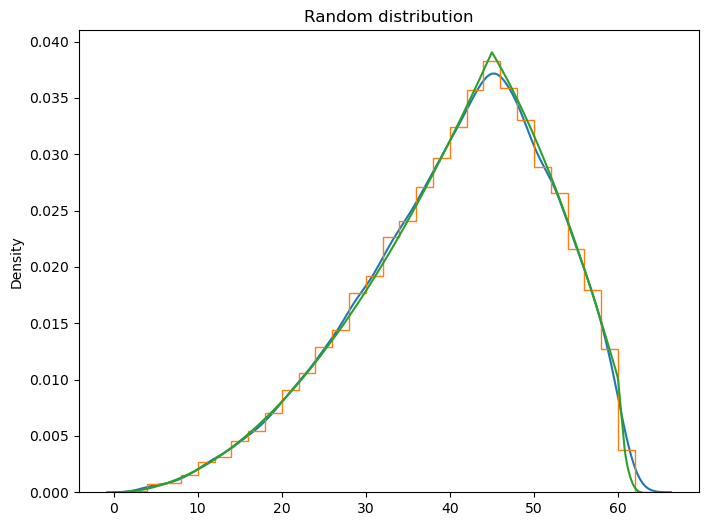

In [312]:
ax = sns.kdeplot(random_distr)
ax.hist(random_distr, bins=bins, histtype='step', density=True)
ax.plot(x, y)
ax.set_title('Random distribution')
plt.show()

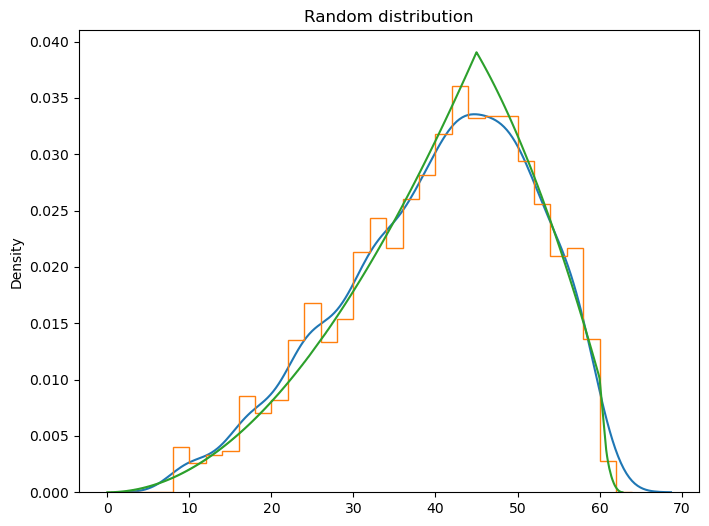

In [311]:
ax = sns.kdeplot(disangles[1])
ax.hist(disangles[1], bins=bins, histtype='step', density=True)
ax.plot(x, y)
ax.set_title('Random distribution')
plt.show()

In [9]:
Q_random, _ = np.histogram(random_distr, bins=bins)
Q_random = Q_random / Q_random.sum()

In [10]:
data = []

In [11]:
columns = [
    'alloy',
    'processing_type',
    'processing_stage',
    'number_of_cells',
    'neighbor_order',
    'number_of_disangles',
    'p',
    'H']

## ECAP2022/Cu_01Cr_01Zr

### pass1

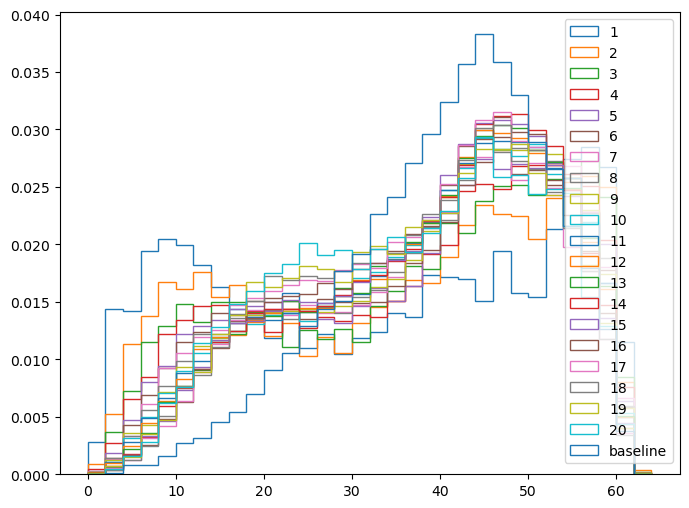

In [12]:
alloy = 'Cu_01Cr_01Zr'
processing_type = 'ECAP'
processing_stage = 1
number_of_cells = 992

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass1/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [13]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass4

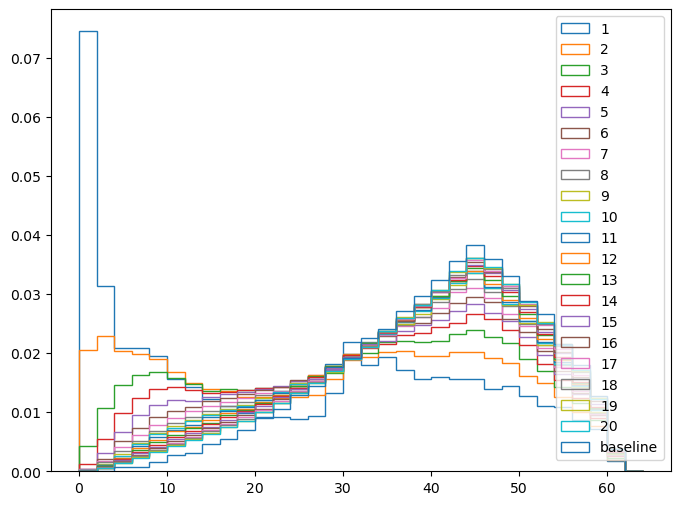

In [15]:
alloy = 'Cu_01Cr_01Zr'
processing_type = 'ECAP'
processing_stage = 4
number_of_cells = 10283

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass4/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [16]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass8

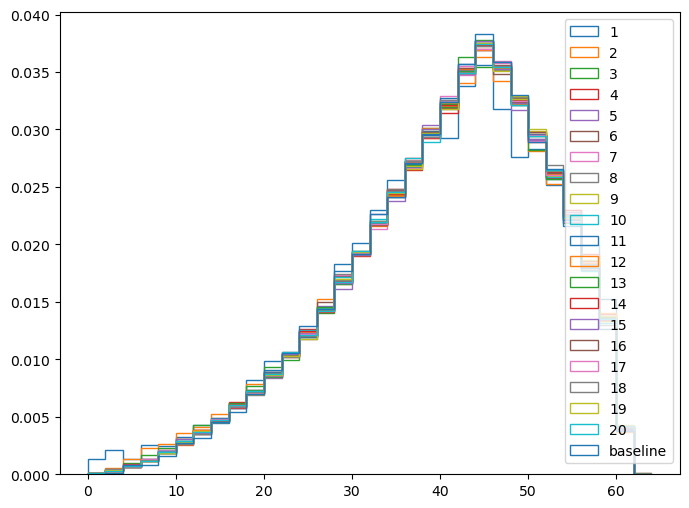

In [17]:
alloy = 'Cu_01Cr_01Zr'
processing_type = 'ECAP'
processing_stage = 8
number_of_cells = 3932

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_Cu_01Cr_01Zr/pass8/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [18]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

## ECAP2022/Cu_01Cr_01Zr RANDOM

### pass1

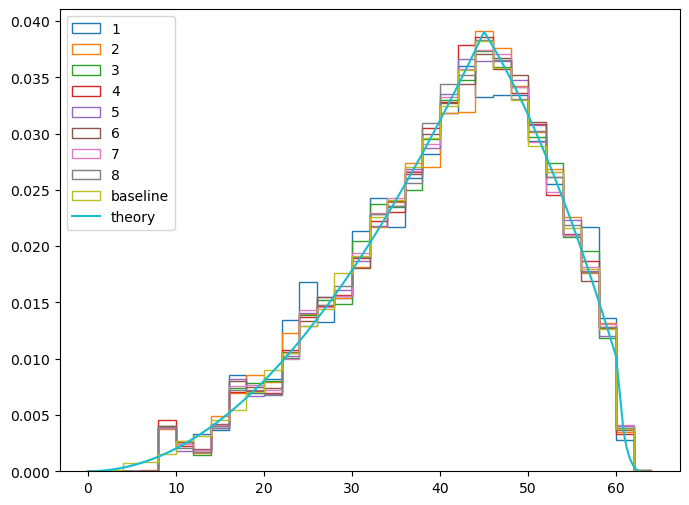

In [309]:
alloy = 'Random'
processing_type = 'ECAP'
processing_stage = 1
number_of_cells = 992

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass1/disangles'

disangles = {}
for i in range(1, 9):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.plot(x, y, label='theory')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [21]:
Q = Q_random

for i in range(1, 9):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass4

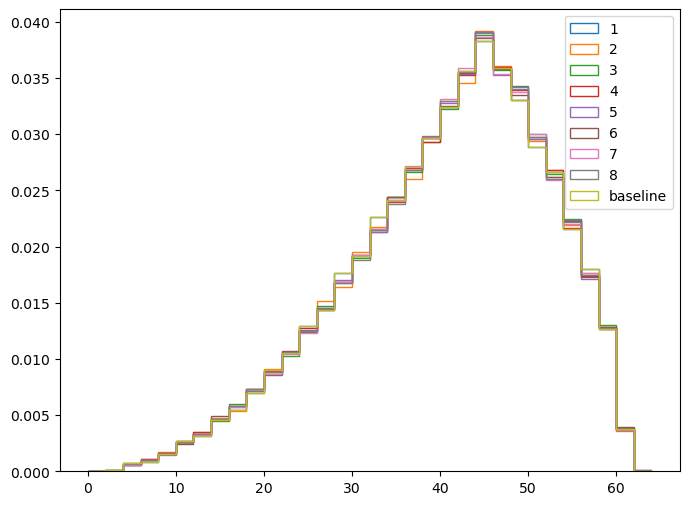

In [23]:
alloy = 'Random'
processing_type = 'ECAP'
processing_stage = 4
number_of_cells = 10283

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass4/disangles'

disangles = {}
for i in range(1, 9):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [24]:
Q = Q_random

for i in range(1, 9):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass8

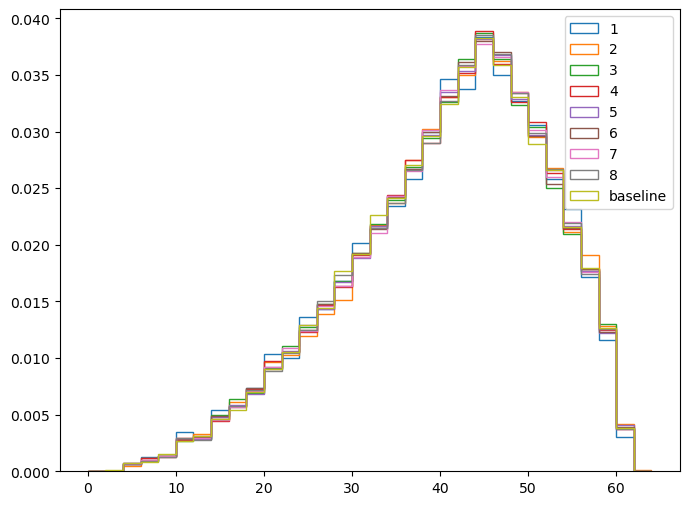

In [25]:
alloy = 'Random'
processing_type = 'ECAP'
processing_stage = 8
number_of_cells = 3932

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr/Neper_RandomOri_Cu-0.1Cr-0.1Zr/pass8/disangles'

disangles = {}
for i in range(1, 9):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [26]:
Q = Q_random

for i in range(1, 9):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

## ECAP2022/Cu_01Cr_01Zr_005Y

### pass1

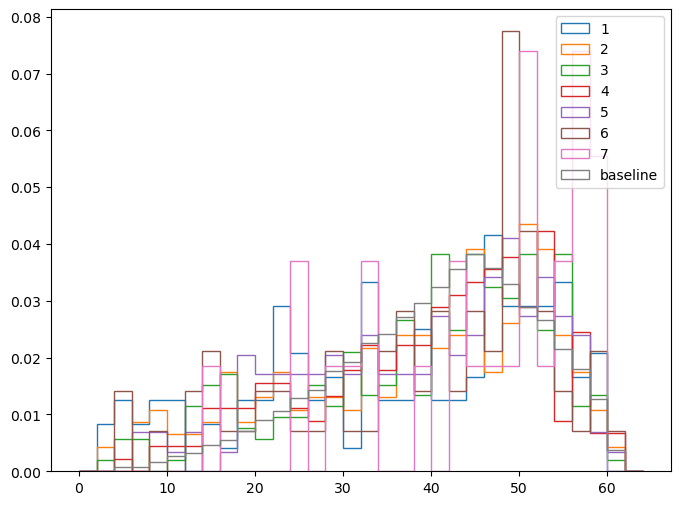

In [28]:
alloy = 'Cu_01Cr_01Zr_005Y'
processing_type = 'ECAP'
processing_stage = 1
number_of_cells = 47

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr_005Y/Neper_Cu_01Cr_01Zr_005Y/pass1/disangles'

disangles = {}
for i in range(1, 8):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 8):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [29]:
Q = Q_random

for i in range(1, 8):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass4

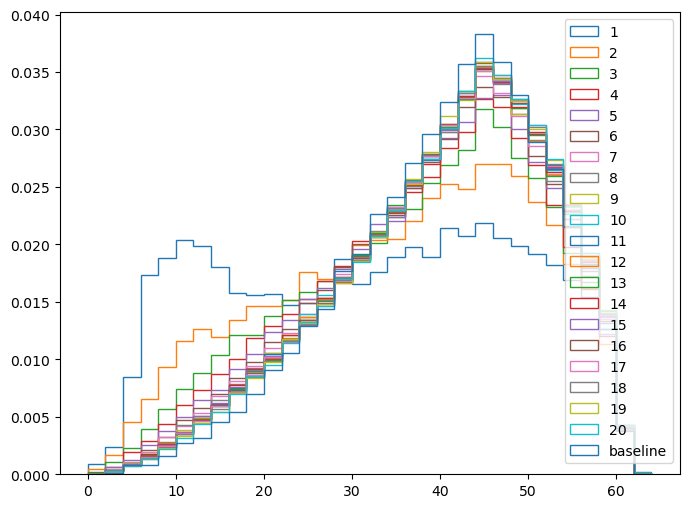

In [30]:
alloy = 'Cu_01Cr_01Zr_005Y'
processing_type = 'ECAP'
processing_stage = 4
number_of_cells = 3941

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr_005Y/Neper_Cu_01Cr_01Zr_005Y/pass4/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [31]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass8

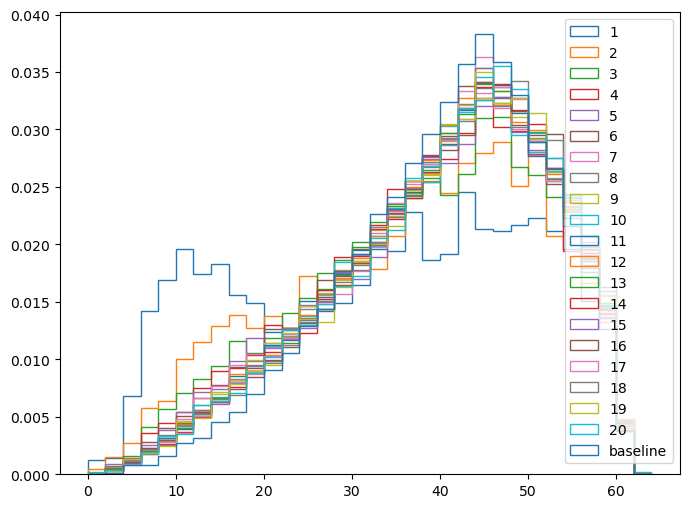

In [32]:
alloy = 'Cu_01Cr_01Zr_005Y'
processing_type = 'ECAP'
processing_stage = 8
number_of_cells = 971

dirname = 'Experimental_Data/ECAP2022/Cu_01Cr_01Zr_005Y/Neper_Cu_01Cr_01Zr_005Y/pass8/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [33]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

## ECAP2022\Cu_03Cr_05Zr

### pass1

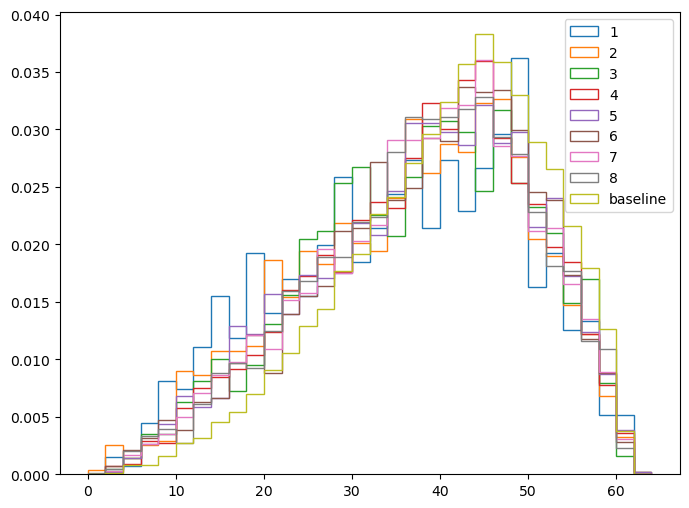

In [36]:
alloy = 'Cu_03Cr_05Zr'
processing_type = 'ECAP'
processing_stage = 1
number_of_cells = 248

dirname = 'Experimental_Data/ECAP2022/Cu_03Cr_05Zr/Neper_Cu_03Cr_05Zr/pass1/disangles'

disangles = {}
for i in range(1, 9):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, 9):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [37]:
Q = Q_random

for i in range(1, 9):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

KeyError: 9

### pass4

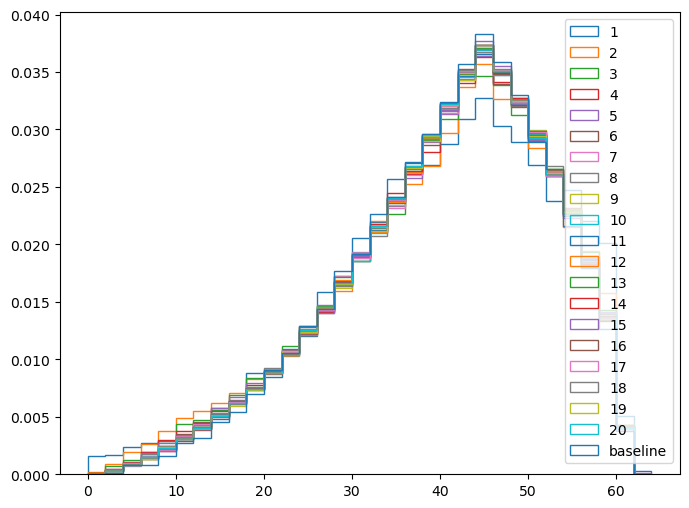

In [66]:
alloy = 'Cu_03Cr_05Zr'
processing_type = 'ECAP'
processing_stage = 4
number_of_cells = 5144

dirname = 'Experimental_Data/ECAP2022/Cu_03Cr_05Zr/Neper_Cu_03Cr_05Zr/pass4/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [67]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

## ECAP2022\Cu_Mg_high_temperature_ECAP

### pass1

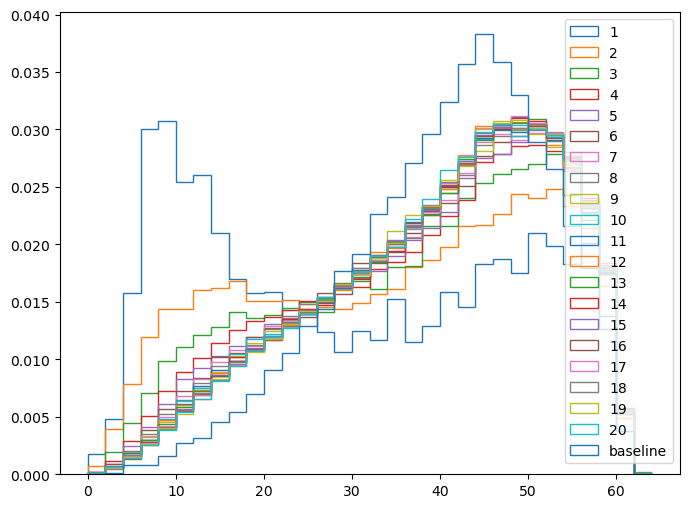

In [68]:
alloy = 'Cu_Mg'
processing_type = 'ECAP'
processing_stage = 1
number_of_cells = 3000

dirname = 'Experimental_Data/ECAP2022/Cu_Mg_high_temperature_ECAP/Neper_Cu-Mg/pass1/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [69]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass2

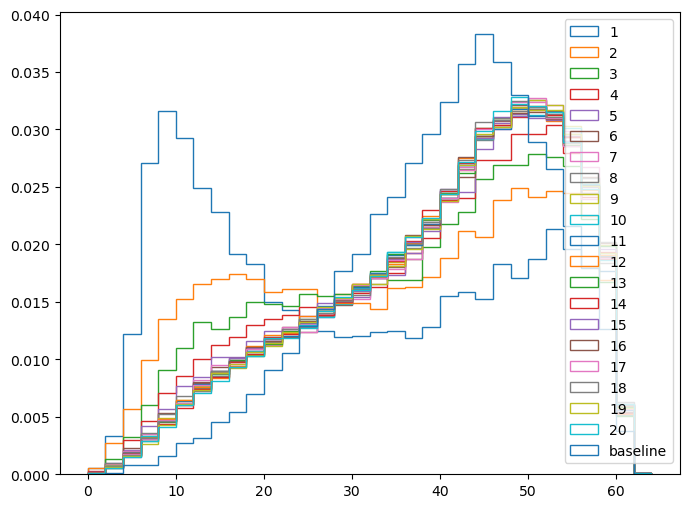

In [70]:
alloy = 'Cu_Mg'
processing_type = 'ECAP'
processing_stage = 2
number_of_cells = 2111

dirname = 'Experimental_Data/ECAP2022/Cu_Mg_high_temperature_ECAP/Neper_Cu-Mg/pass2/disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [71]:
Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    data.append((alloy, processing_type, processing_stage, number_of_cells, i, len(disangles[i]), get_p(disangles[i])[0], round(d, 3)))

### pass4

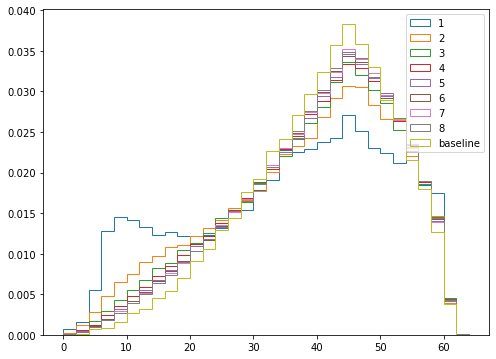

In [208]:
title = 'ECAP2022\Cu_Mg_high_temperature_ECAP/pass4'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_Mg_high_temperature_ECAP\\Neper_Cu-Mg\pass4\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [209]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 40882 0.0 True
2 90591 0.0 True
3 148188 0.0 True
4 209445 0.0 True
5 273174 0.0 True
6 337593 0.0 True
7 402340 0.0 True
8 467386 0.0 True


In [210]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance4 = distance

1 0.191
2 0.111
3 0.075
4 0.061
5 0.052
6 0.048
7 0.044
8 0.043


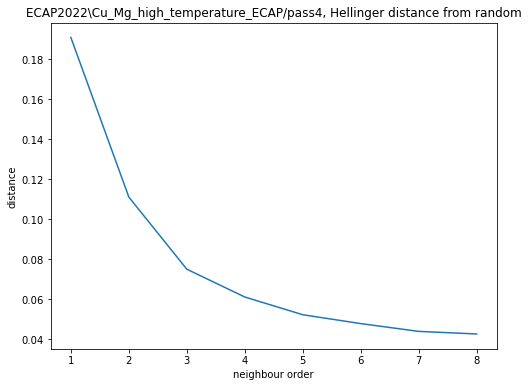

In [211]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### pass8

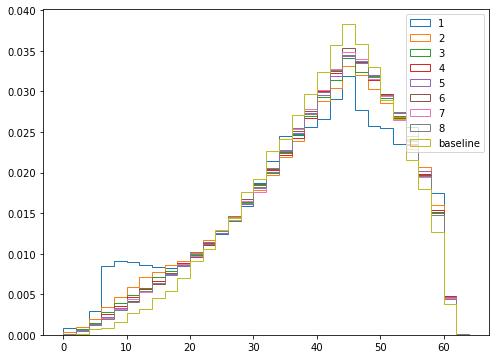

In [212]:
title = 'ECAP2022\Cu_Mg_high_temperature_ECAP/pass8'
dirname = 'Experimental_Data2\Experimental_Data\ECAP2022\Cu_Mg_high_temperature_ECAP\\Neper_Cu-Mg\pass8\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [213]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 29210 0.0 True
2 64435 0.0 True
3 104373 0.0 True
4 146058 0.0 True
5 188023 0.0 True
6 229634 0.0 True
7 270582 0.0 True
8 310770 0.0 True


In [214]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance8 = distance

1 0.127
2 0.081
3 0.063
4 0.057
5 0.053
6 0.048
7 0.049
8 0.048


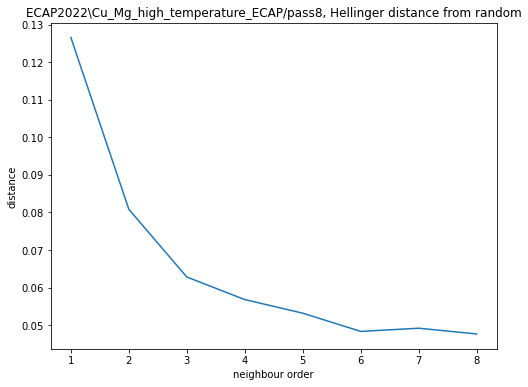

In [215]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

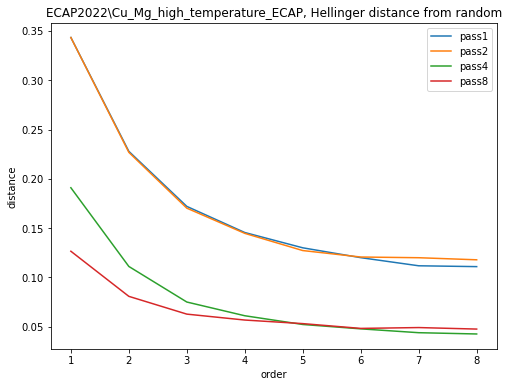

In [217]:
plt.plot(x, distance1, label='pass1')
plt.plot(x, distance2, label='pass2')
plt.plot(x, distance4, label='pass4')
plt.plot(x, distance8, label='pass8')
plt.title('ECAP2022\Cu_Mg_high_temperature_ECAP' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

## HPT2022

### htp1.2

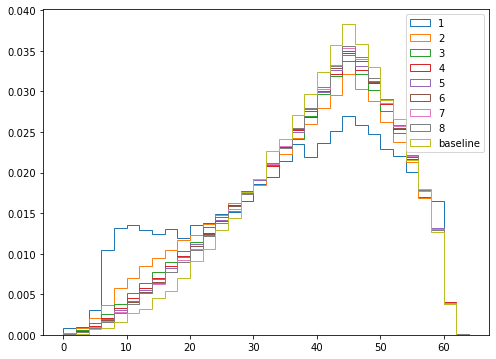

In [218]:
title = 'HPT2022/hpt1.2'
dirname = 'Experimental_Data2\Experimental_Data\HPT2022\HPT\\Neper_Cu_03Cr_05Zr\hpt1.2\disangles'

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

In [219]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 73795 0.0 True
2 162222 0.0 True
3 262049 0.0 True
4 367494 0.0 True
5 474746 0.0 True
6 582835 0.0 True
7 690828 0.0 True
8 798176 0.0 True


In [220]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance1 = distance

1 0.177
2 0.1
3 0.067
4 0.055
5 0.05
6 0.045
7 0.042
8 0.04


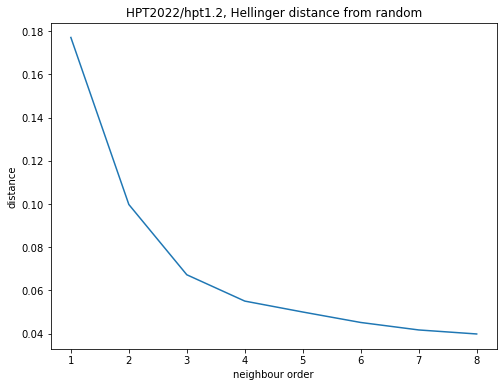

In [223]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

### hpt3

In [303]:
title = 'HPT2022/hpt3'
dirname = 'Experimental_Data2\Experimental_Data\HPT2022\HPT\\Neper_Cu_03Cr_05Zr\hpt3\disangles'

max_order = 7

disangles = {}
for i in range(1, max_order + 1):
    filename = os.path.join(dirname, f'disangles{i}.txt')
    disangles[i] = np.loadtxt(filename)

for i in range(1, max_order + 1):
    plt.hist(disangles[i], bins=bins, density=True, histtype='step', label=str(i))
plt.hist(random_distr, bins=bins, density=True, histtype='step', label='baseline')
plt.legend()
plt.show()
# fname = os.path.join(dirname, f'disangles.png')
# plt.savefig(fname, dpi=300)

OSError: Experimental_Data2\Experimental_Data\HPT2022\HPT\Neper_Cu_03Cr_05Zr\hpt3\disangles/disangles1.txt not found.

In [226]:
print('Is difference from random significant?')
for i in range(1, max_order + 1):
    ns, _ = np.histogram(disangles[i], bins=bins)
    ms, _ = np.histogram(random_distr, bins=bins)
    _, pvalue = matutils._check_chi2(ns, ms)
    print(i, len(disangles[i]), pvalue, pvalue < 0.001)

Is difference from random significant?
1 102851 0.0 True
2 225697 0.0 True
3 364050 0.0 True
4 510261 0.0 True
5 659600 0.0 True
6 810239 0.0 True
7 961060 0.0 True


In [227]:
distance = []
x = []

Q = Q_random

for i in range(1, max_order + 1):
    P, _ = np.histogram(disangles[i], bins=bins)
    P = P / P.sum()
    d = matutils._hellinger(P, Q)
    x.append(i)
    distance.append(d)
    print(i, round(d, 3))
    
distance3 = distance

1 0.084
2 0.07
3 0.057
4 0.055
5 0.054
6 0.052
7 0.051


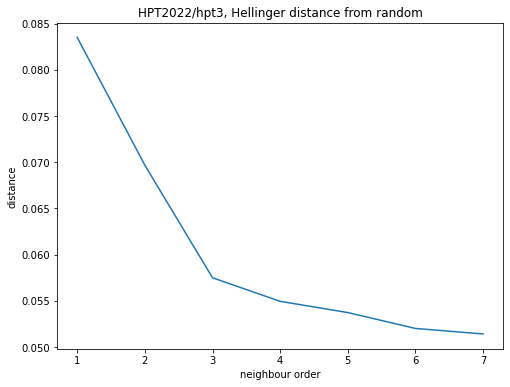

In [228]:
plt.plot(x, distance)
plt.title(title + ', Hellinger distance from random')
plt.xlabel('neighbour order')
plt.ylabel('distance')
plt.xticks(x)
# plt.legend()
plt.show()

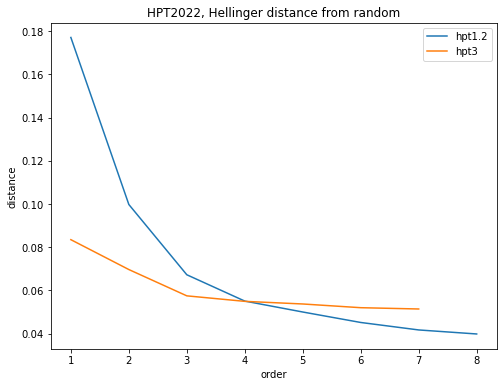

In [232]:
plt.plot(x + [8], distance1, label='hpt1.2')
plt.plot(x, distance3, label='hpt3')
plt.title('HPT2022' + ', Hellinger distance from random')
plt.xlabel('order')
plt.ylabel('distance')
plt.legend()
plt.show()

In [72]:
df = pd.DataFrame(data, columns=columns)
df

,alloy,processing_type,processing_stage,number_of_cells,neighbor_order,number_of_disangles,p,H
0,Cu_01Cr_01Zr,ECAP,1,992,1,2858,0.235,0.319
1,Cu_01Cr_01Zr,ECAP,1,992,2,6598,0.180,0.256
2,Cu_01Cr_01Zr,ECAP,1,992,3,11163,0.143,0.222
3,Cu_01Cr_01Zr,ECAP,1,992,4,15992,0.132,0.204
4,Cu_01Cr_01Zr,ECAP,1,992,5,20647,0.112,0.183
...,...,...,...,...,...,...,...,...
194,Cu_Mg,ECAP,2,2111,16,104517,0.057,0.109
195,Cu_Mg,ECAP,2,2111,17,105540,0.057,0.109
196,Cu_Mg,ECAP,2,2111,18,105512,0.056,0.106
197,Cu_Mg,ECAP,2,2111,19,103846,0.054,0.107


In [73]:
df.to_csv('Data2.csv', index=False)

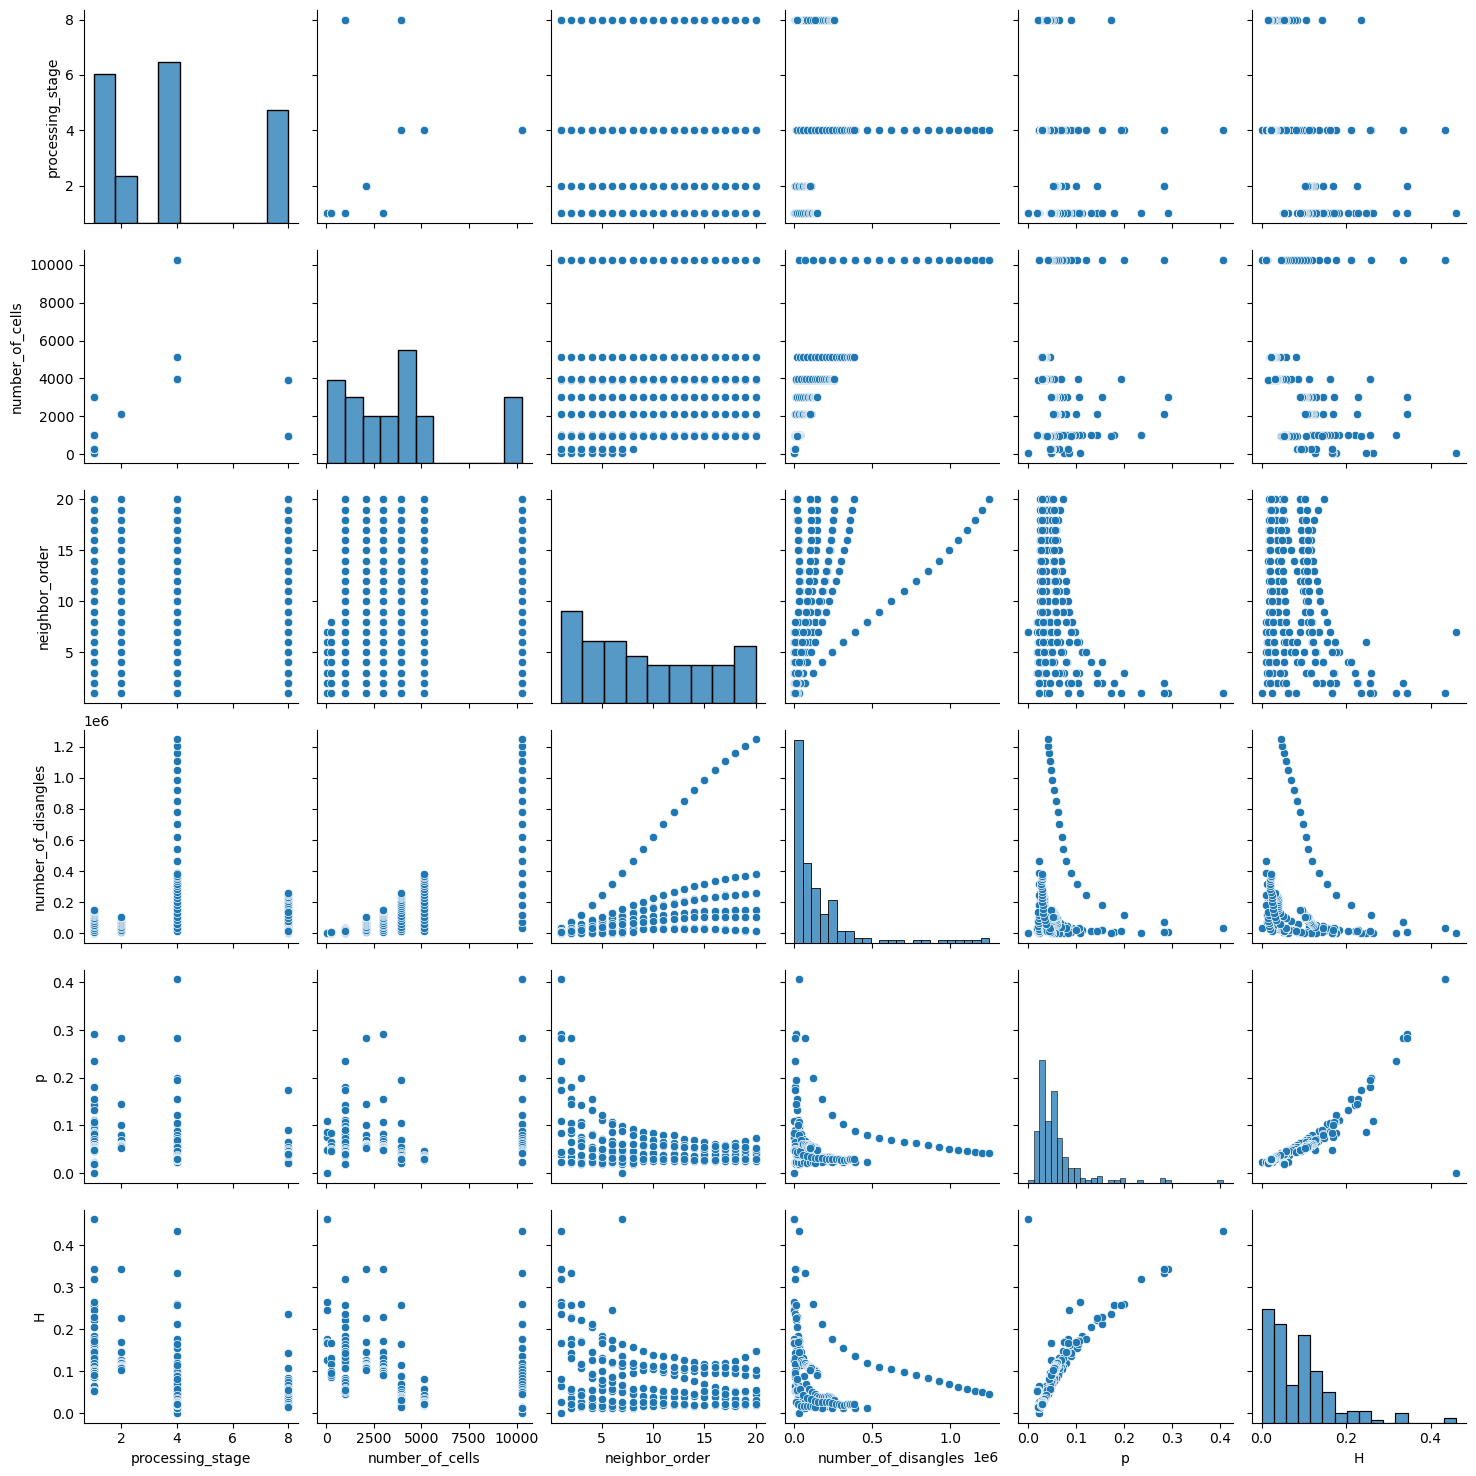

In [74]:
sns.pairplot(data=df)

In [77]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

<AxesSubplot:xlabel='neighbor_order', ylabel='number_of_disangles'>

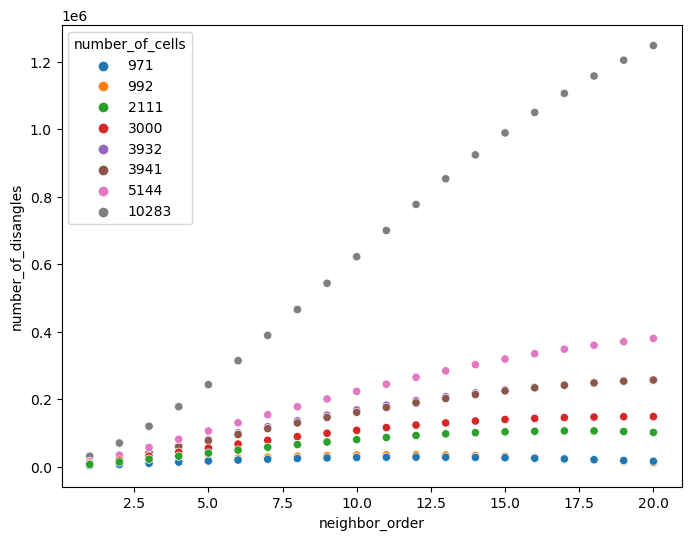

In [78]:
filt = df['number_of_cells'] > 900
sns.scatterplot(data=df[filt], x='neighbor_order', y='number_of_disangles', hue='number_of_cells', legend='full', palette="tab10")

<AxesSubplot:xlabel='neighbor_order', ylabel='number_of_disangles'>

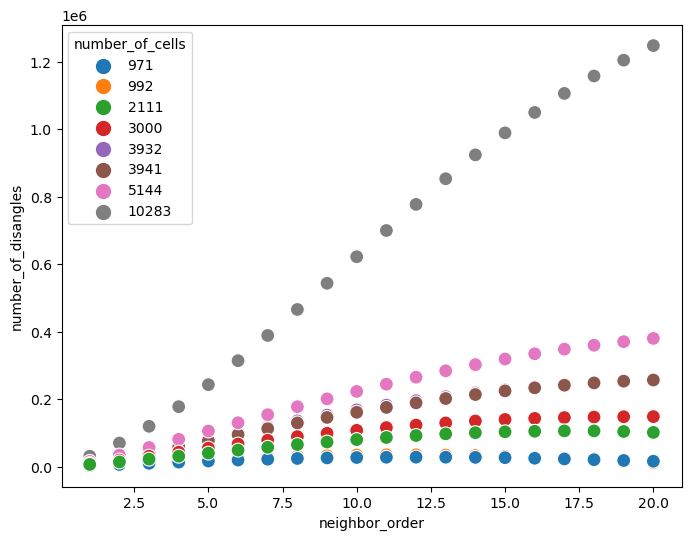

In [107]:
filt = df['number_of_cells'] > 900
sns.scatterplot(data=df[filt], x='neighbor_order', y='number_of_disangles', hue='number_of_cells', legend='full', palette="tab10")

In [106]:
mpl.rcParams['lines.markersize'] = 10

In [122]:
mpl.rcParams['lines.markersize'] = 6

In [111]:
data_df = df.copy()

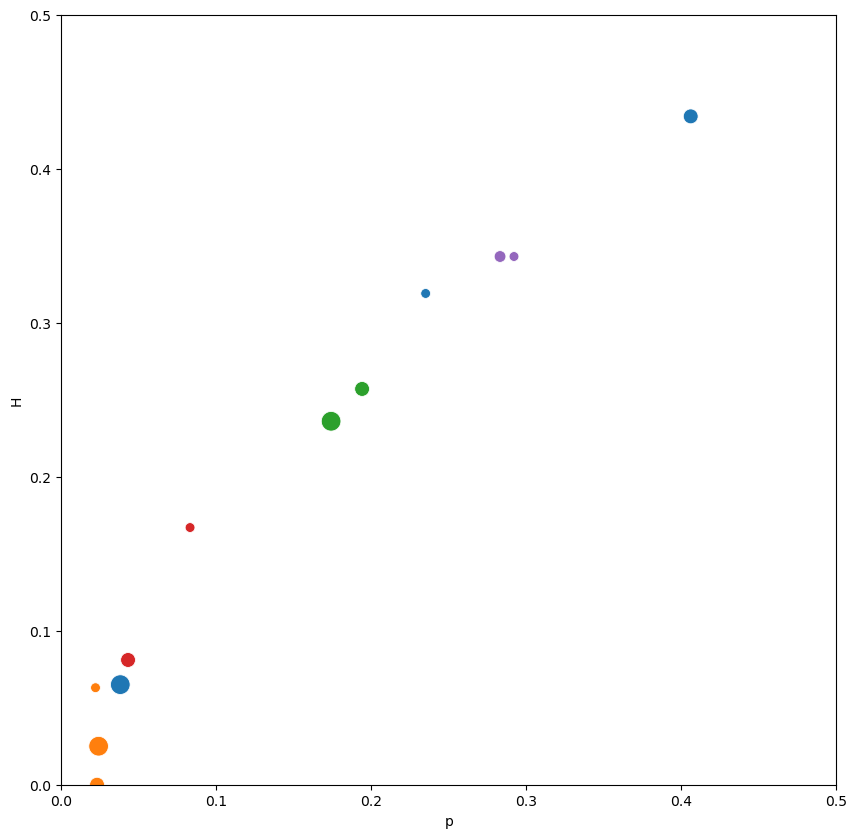

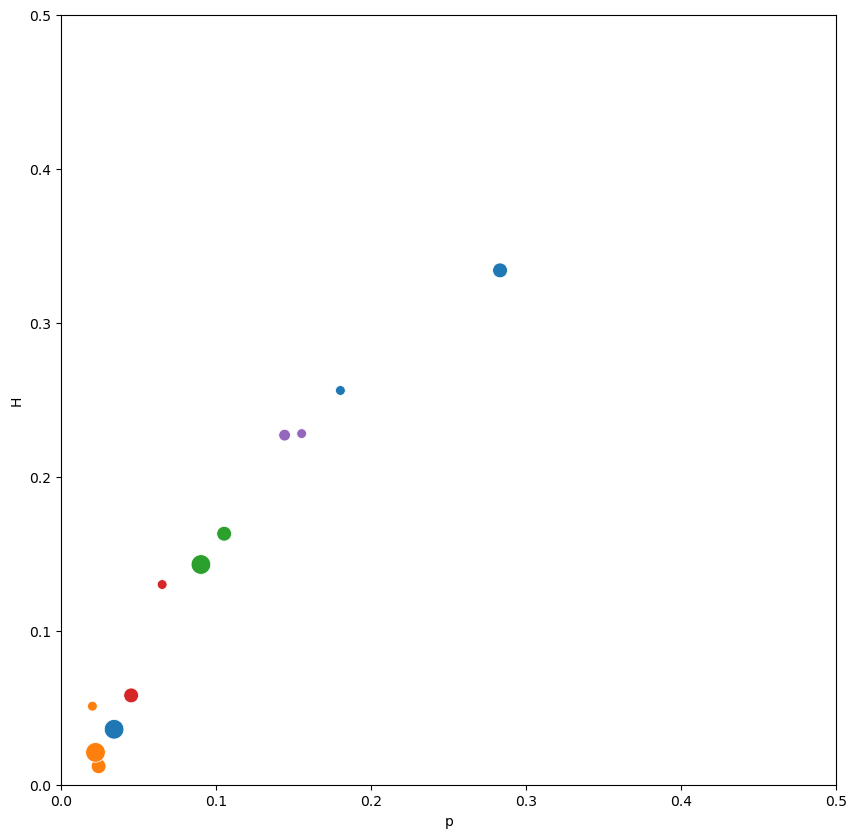

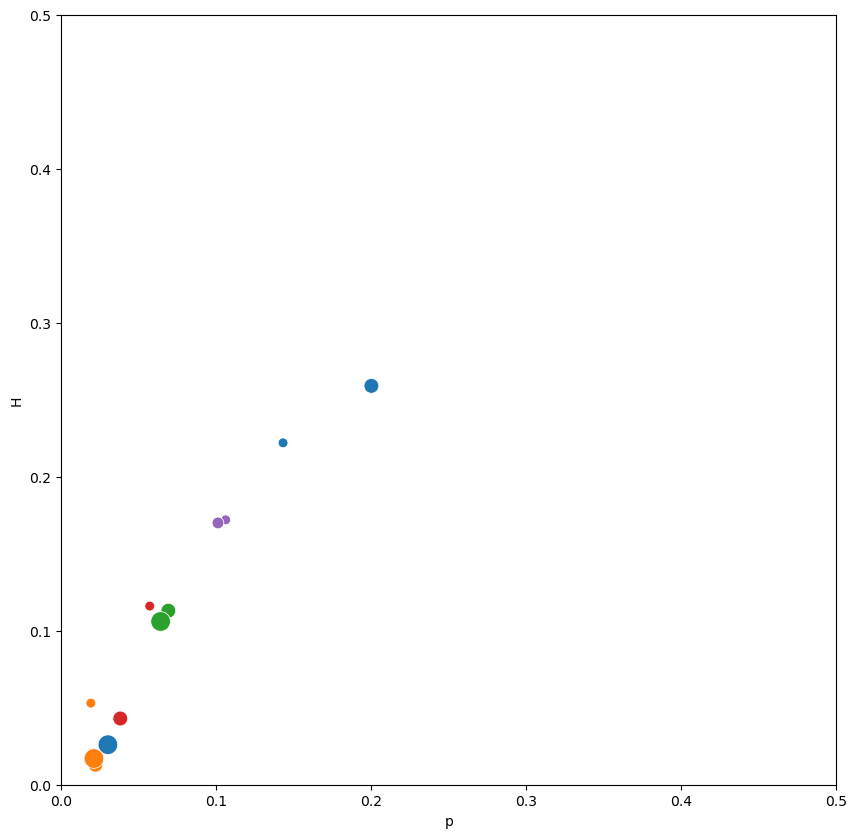

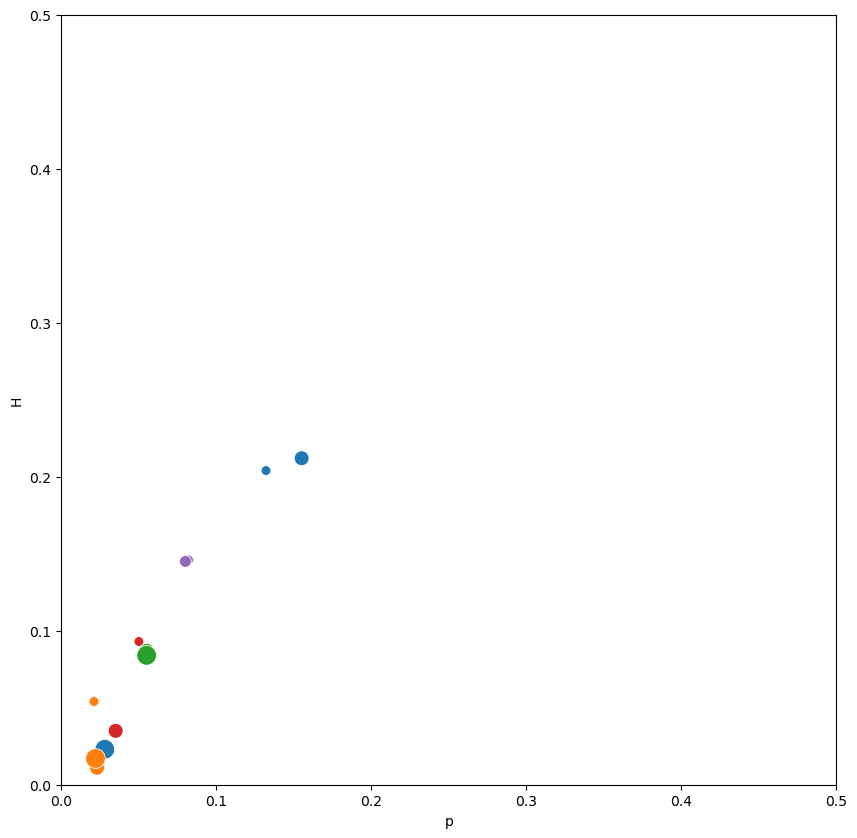

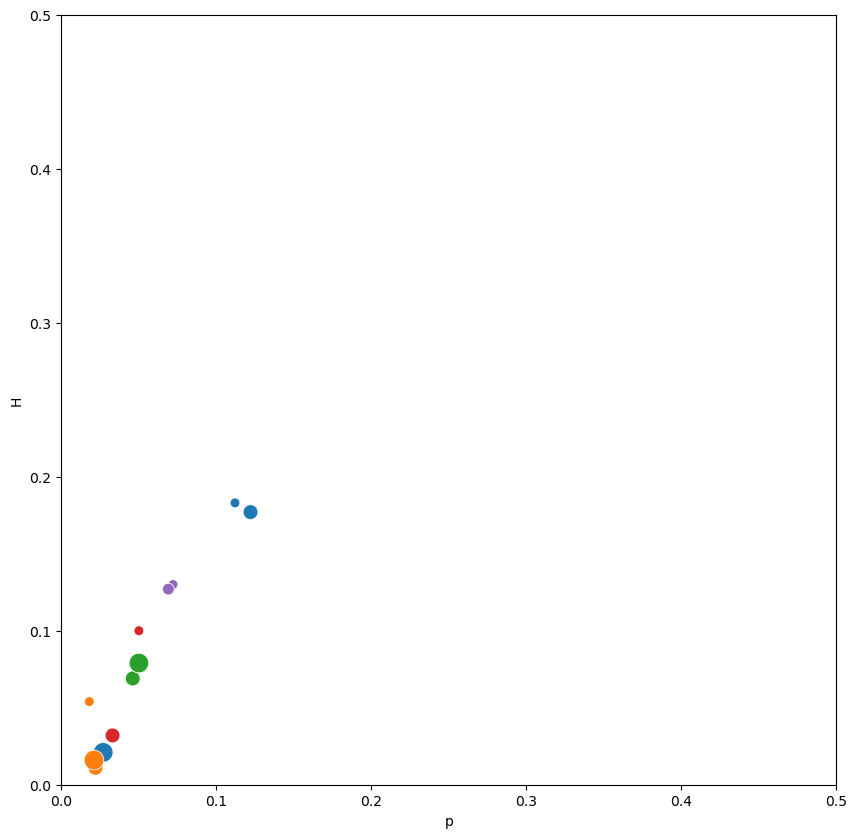

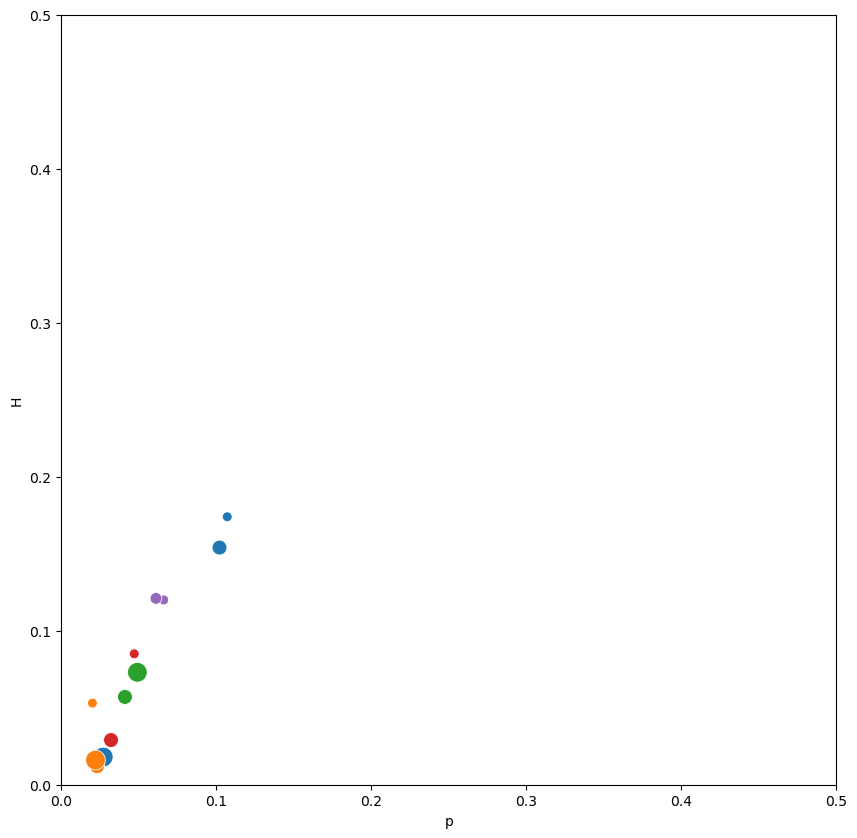

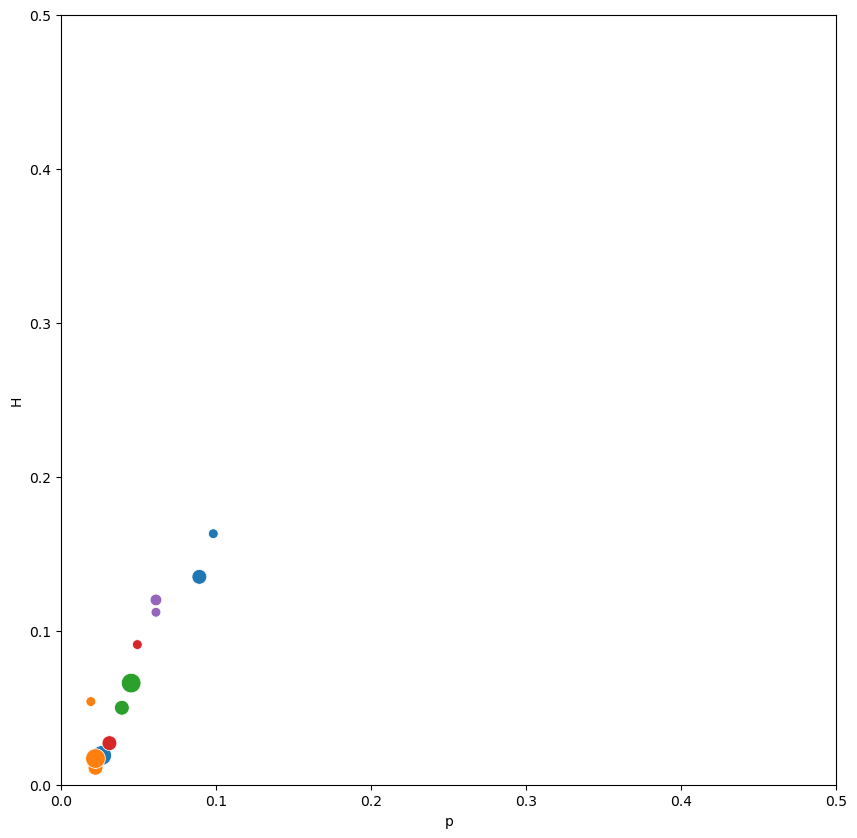

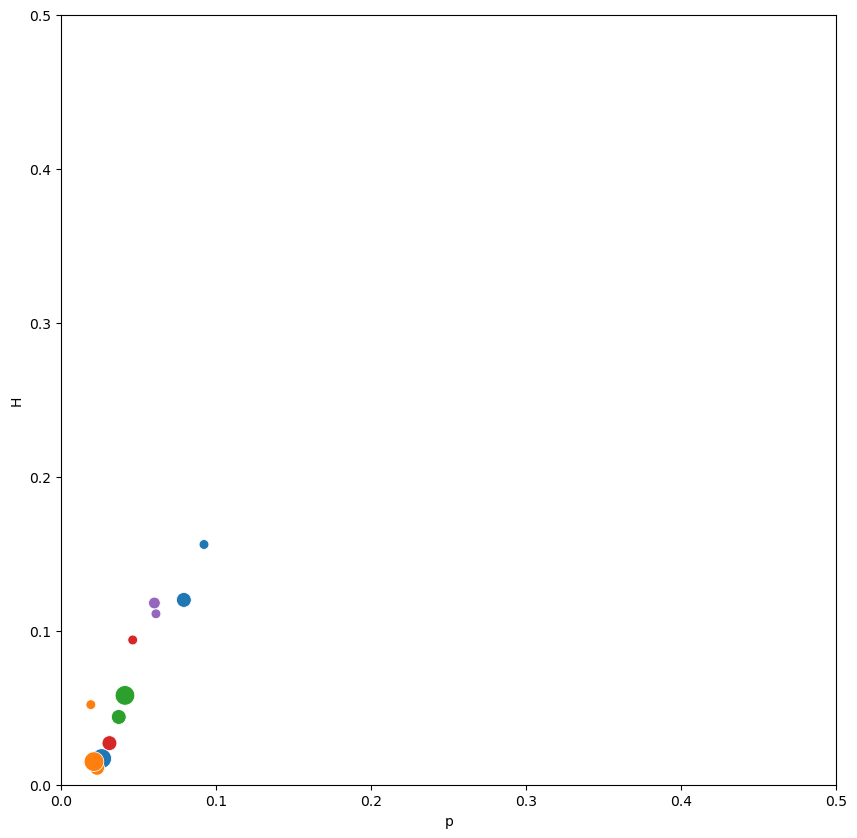

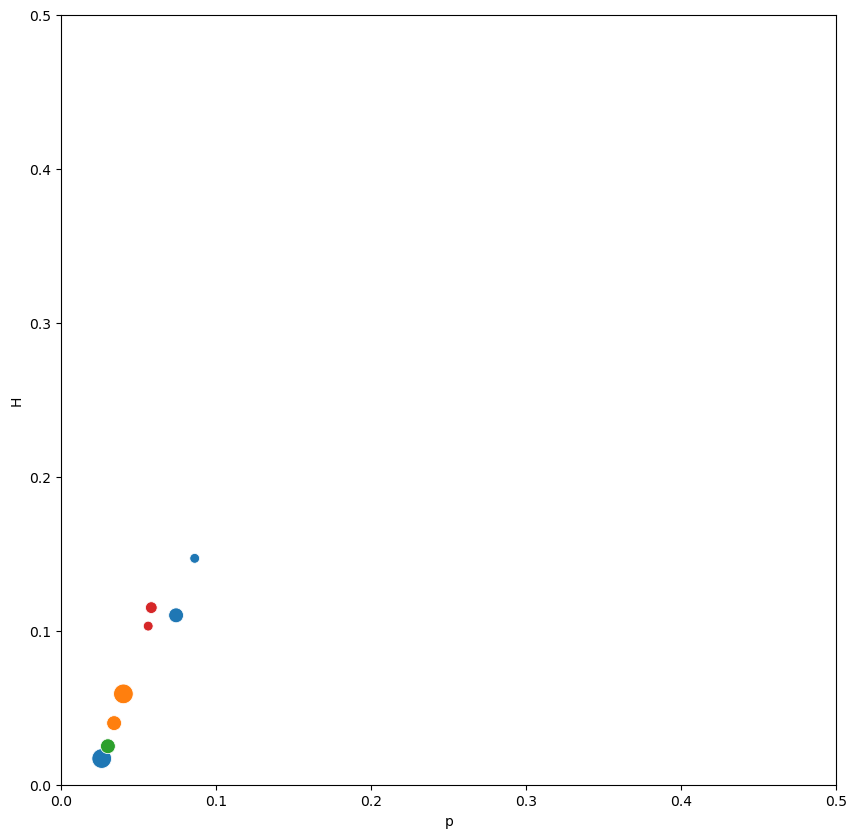

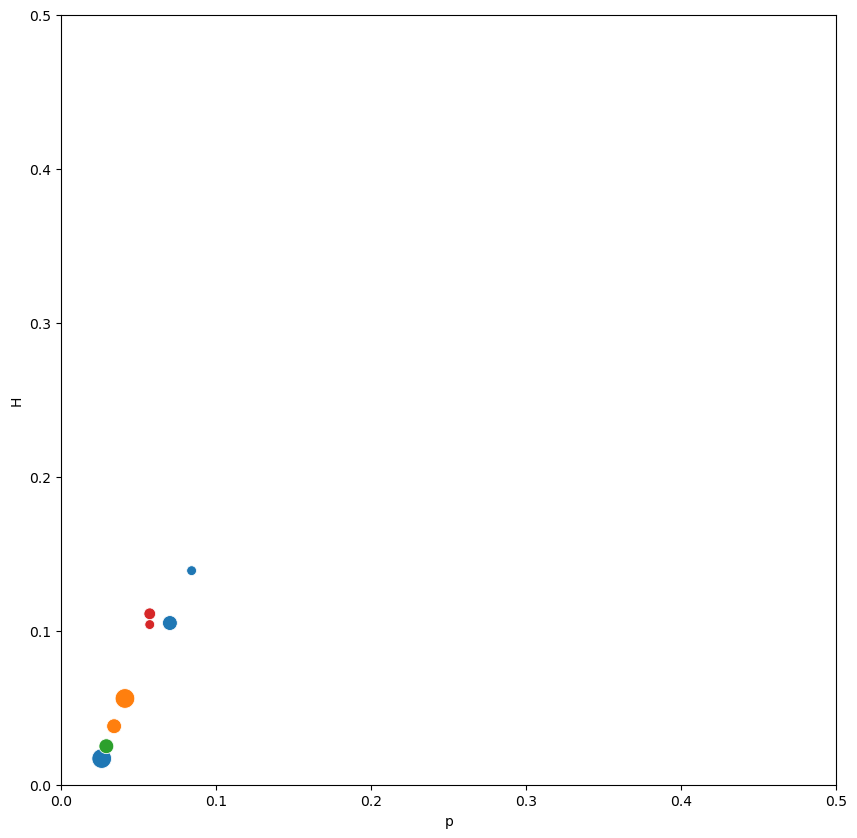

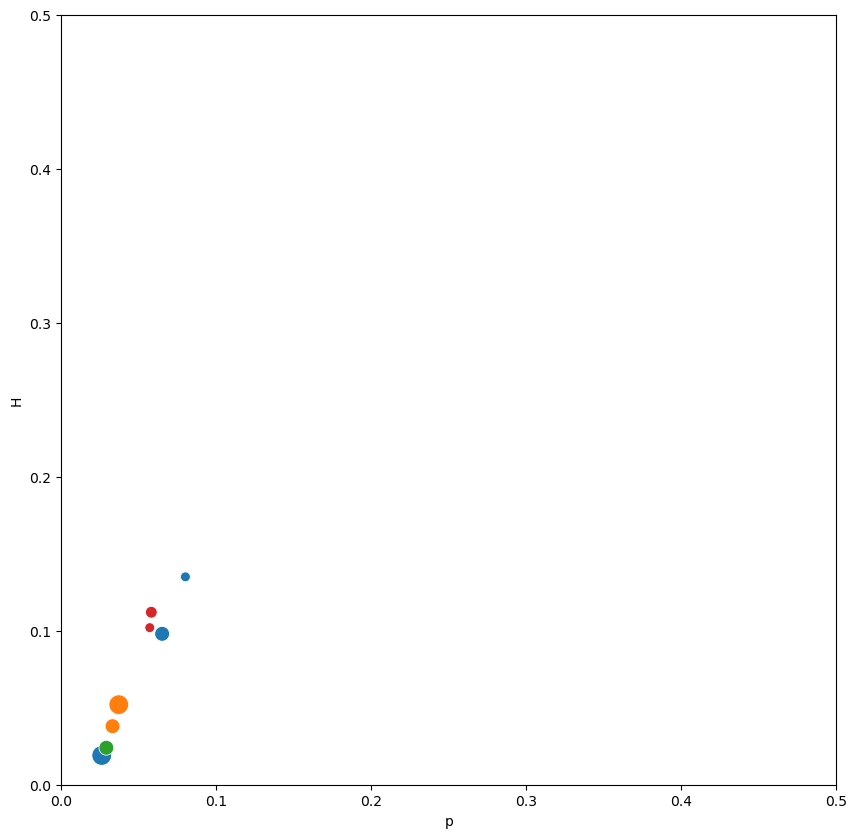

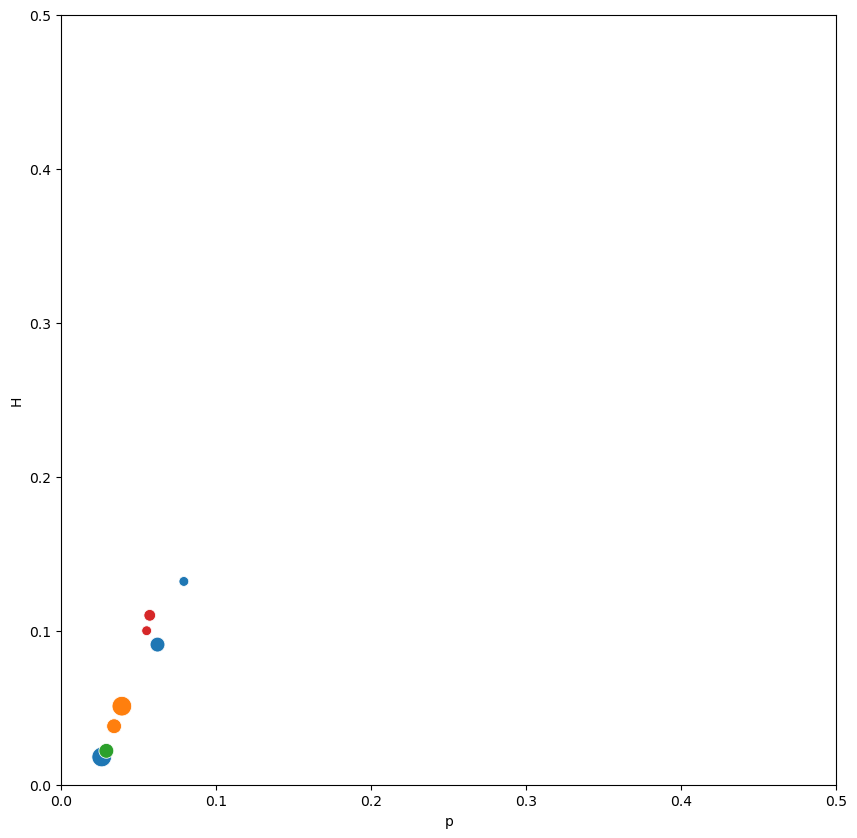

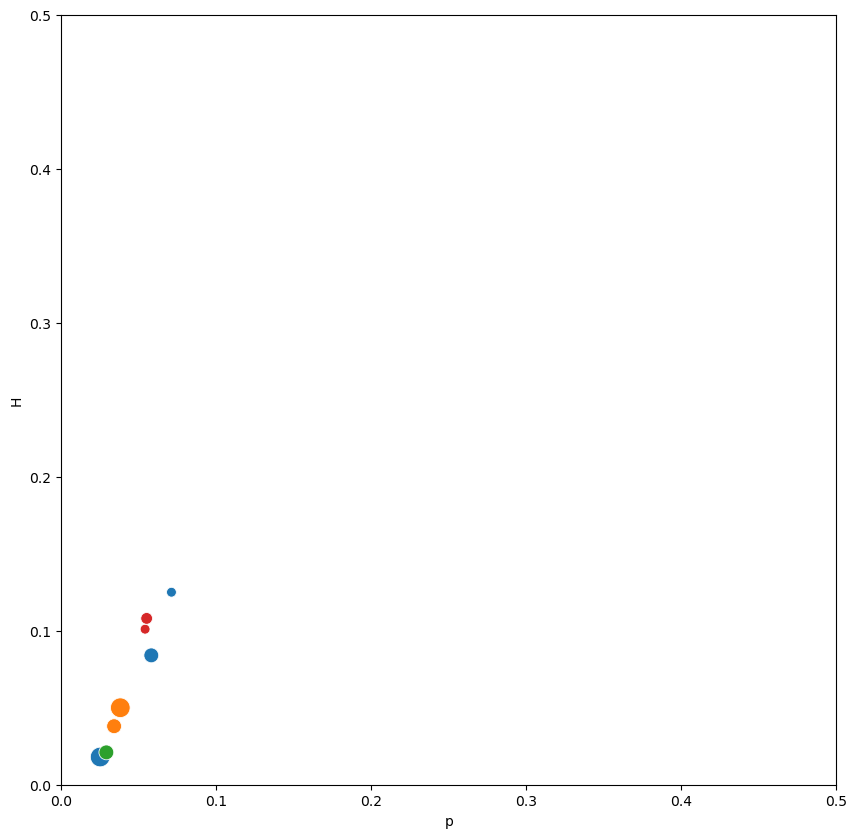

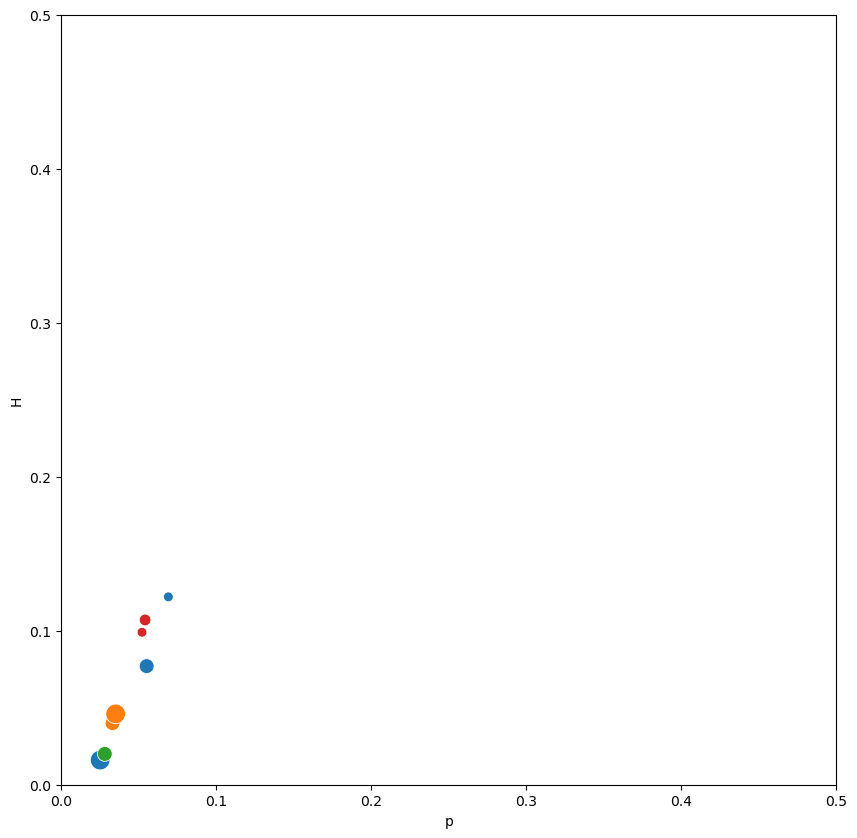

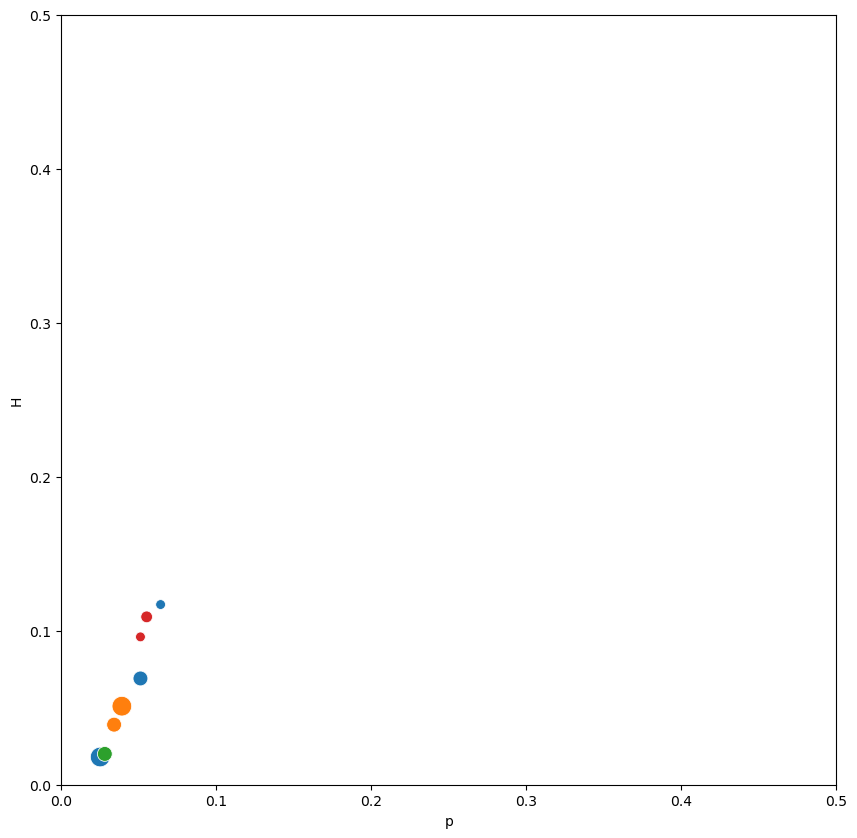

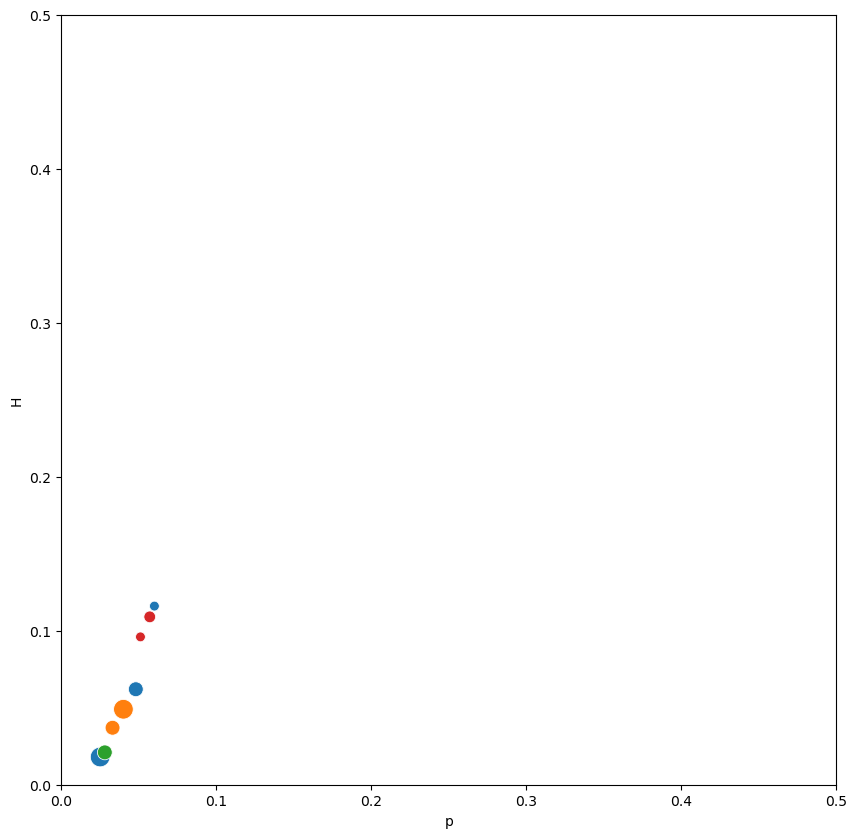

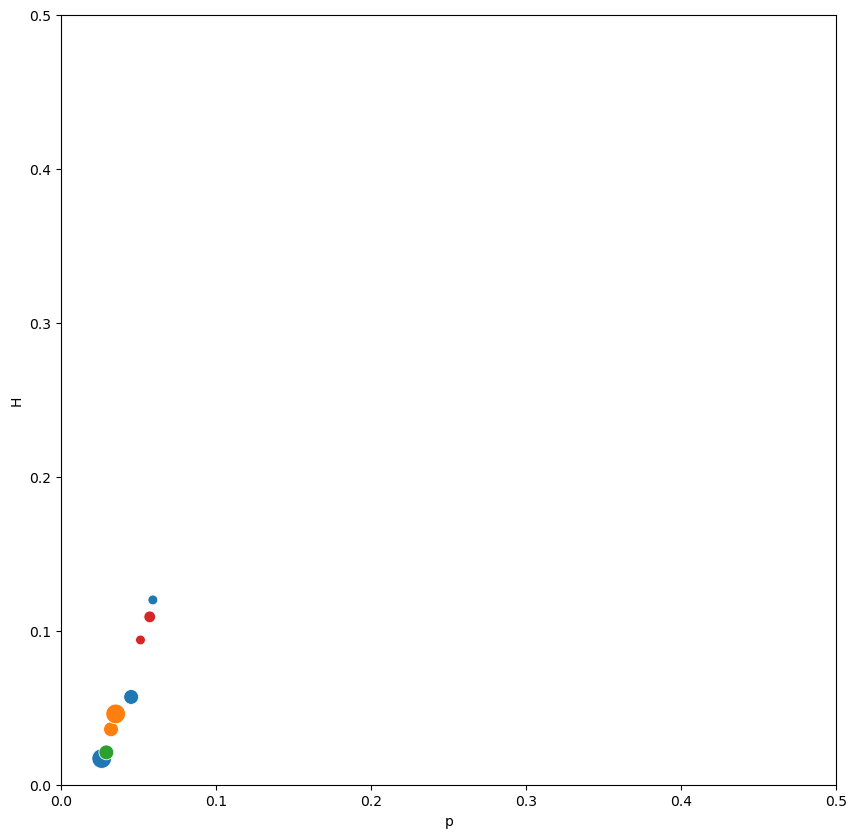

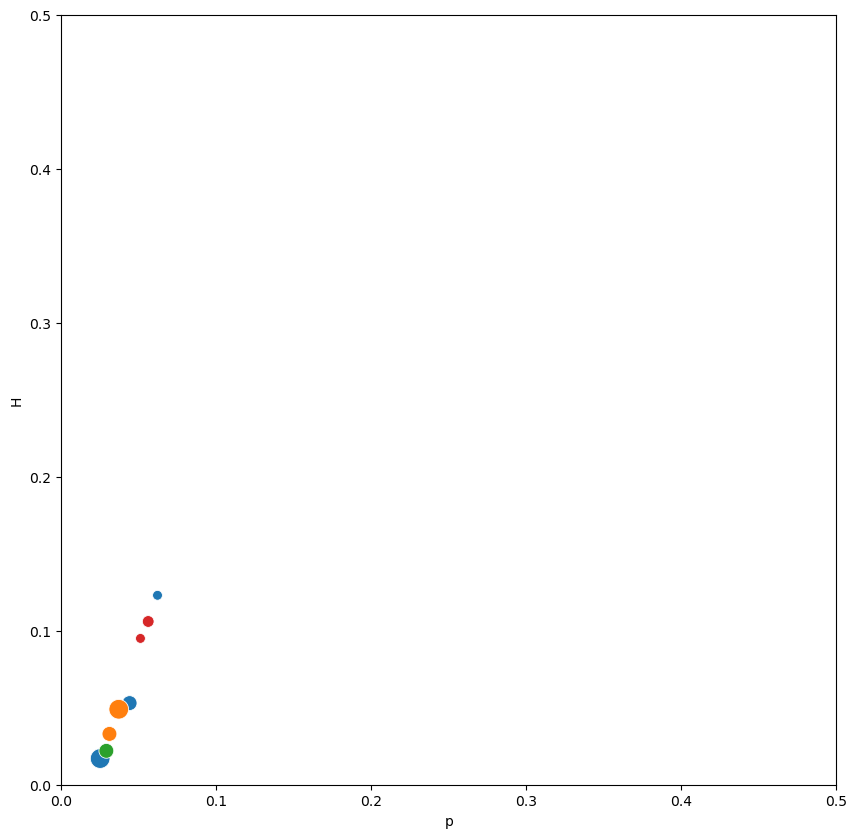

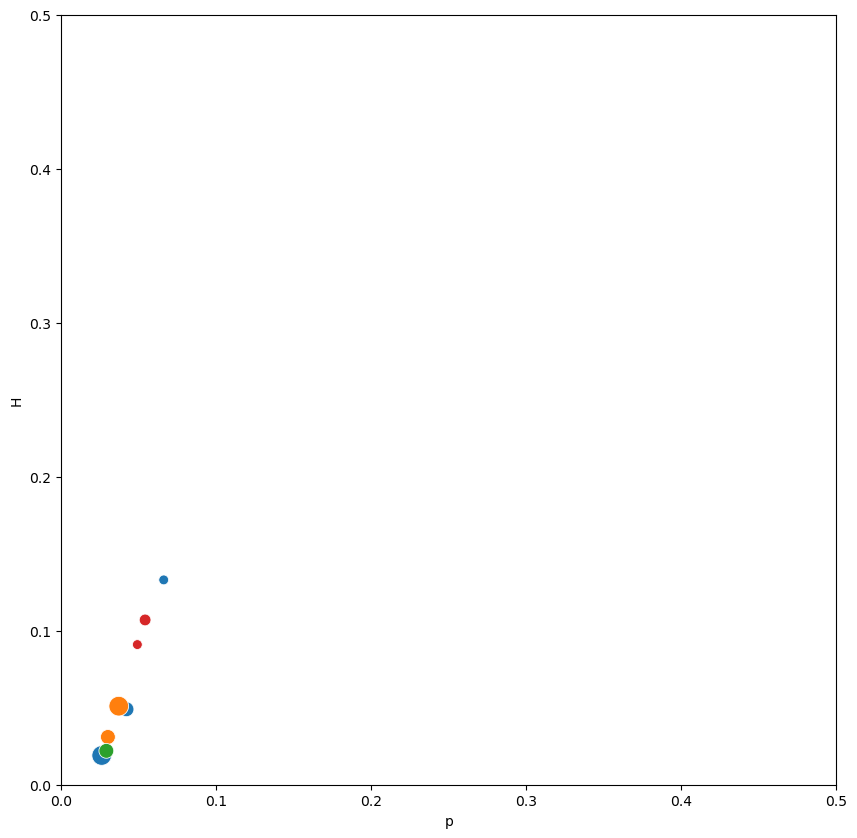

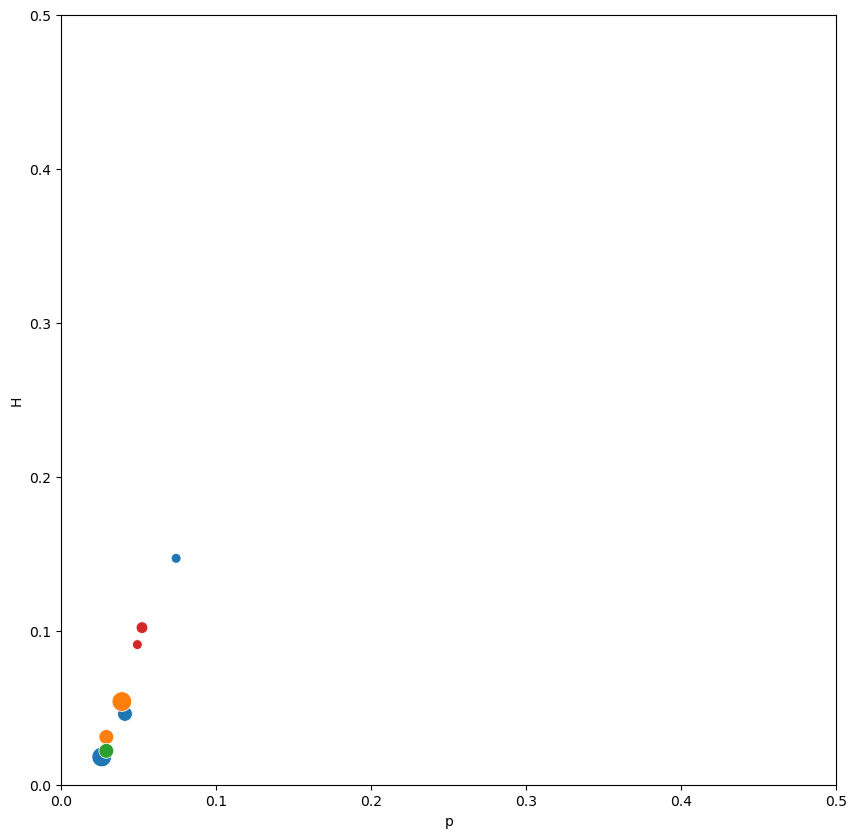

In [114]:
df = data_df

for i in range(1, 21):
    filt = (df['neighbor_order'] == i)&(df['number_of_cells'] > 200)
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df[filt], x='p', y='H', hue='alloy', size='processing_stage', legend=False)
    plt.xlim([0, 0.5])
    plt.ylim([0, 0.5])
    plt.savefig(f'pictures/PvsH{i}.png', dpi=300)

In [129]:
df['alloy'].unique().tolist()

['Cu_01Cr_01Zr', 'Random', 'Cu_01Cr_01Zr_005Y', 'Cu_03Cr_05Zr', 'Cu_Mg']

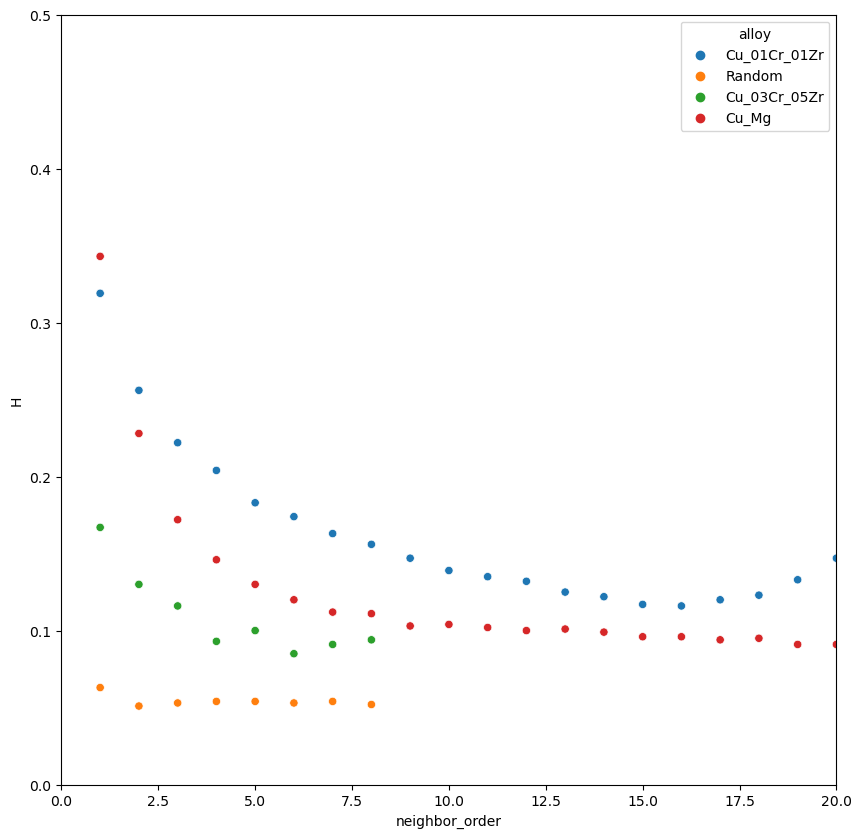

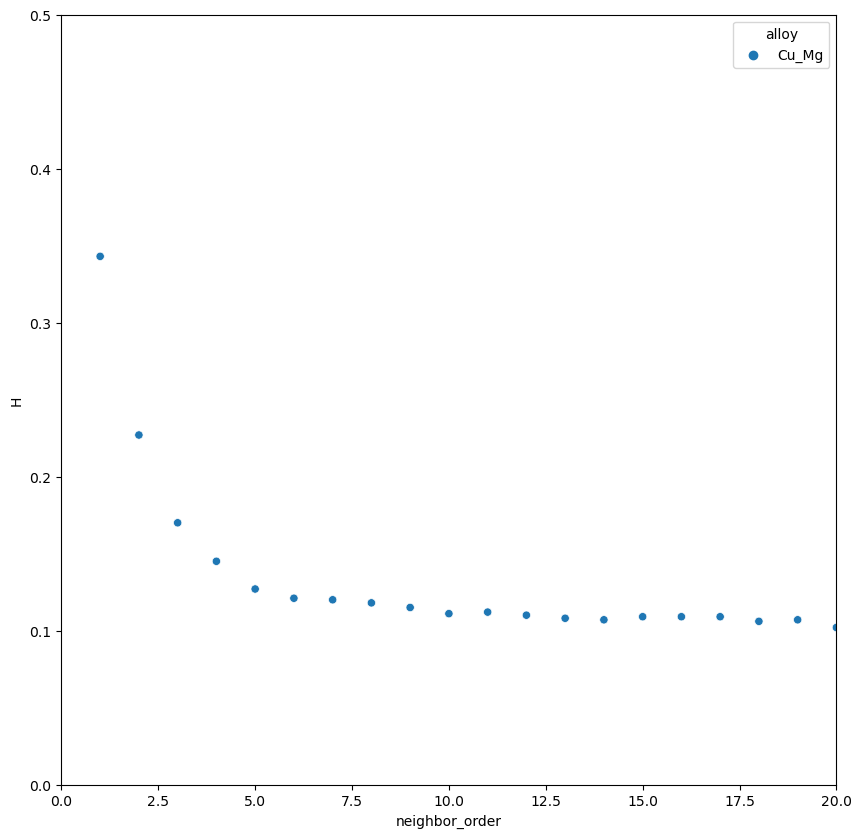

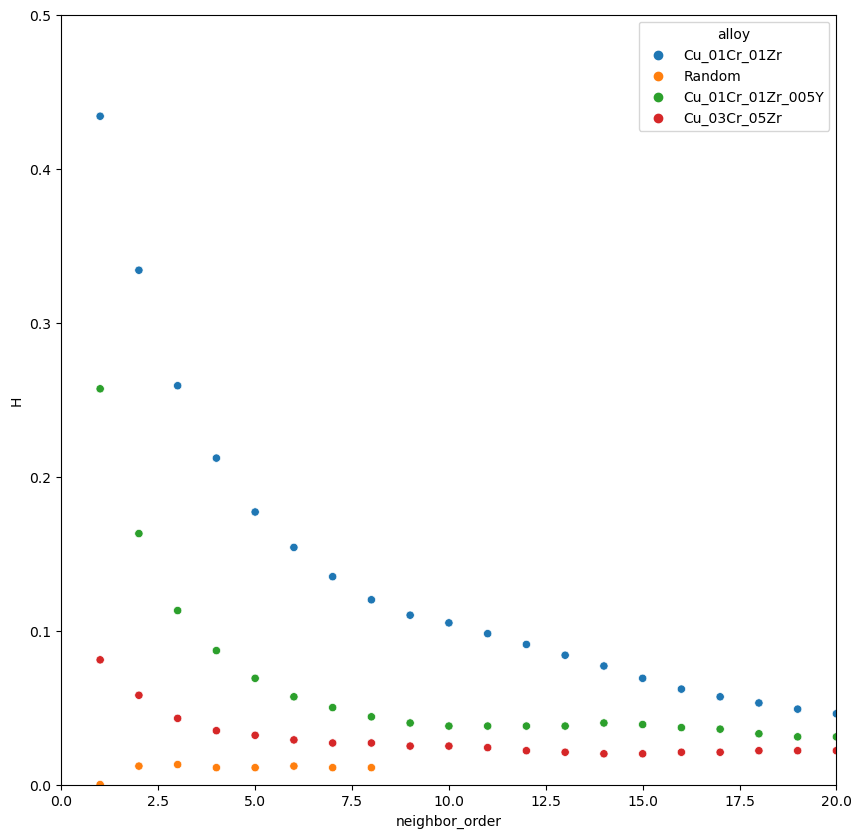

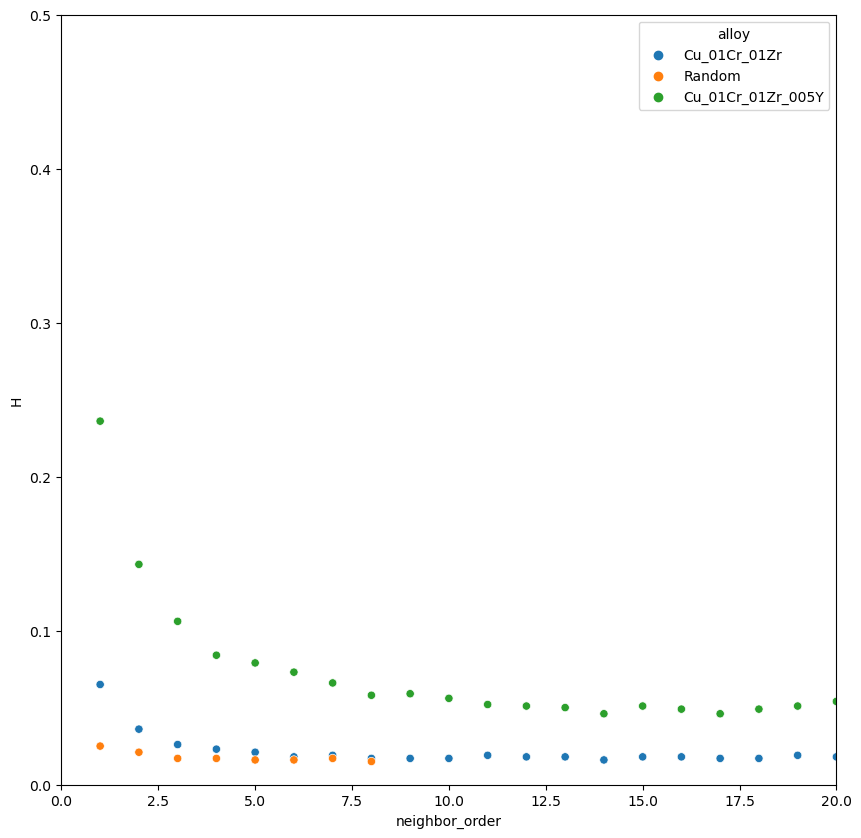

In [123]:
df = data_df

for i in [1, 2, 4, 8]:
    filt = (df['number_of_cells'] > 200)&(df['processing_stage'] == i)
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df[filt], x='neighbor_order', y='H', hue='alloy')
    plt.xlim([0, 20])
    plt.ylim([0, 0.5])
    plt.savefig(f'pictures2/HvsOrder{i}.png', dpi=300)

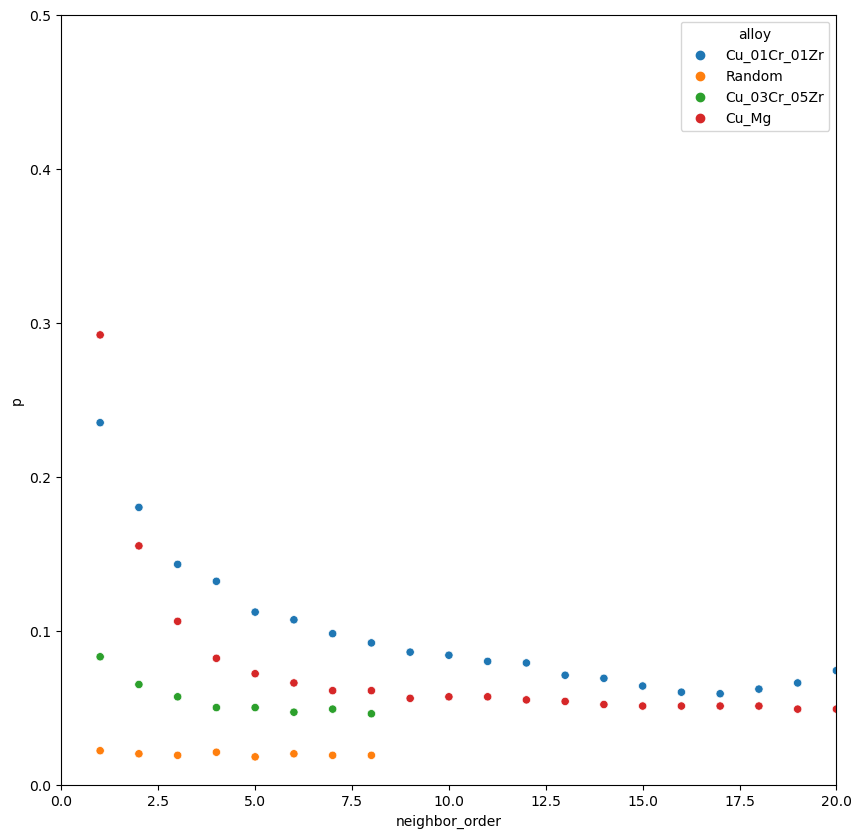

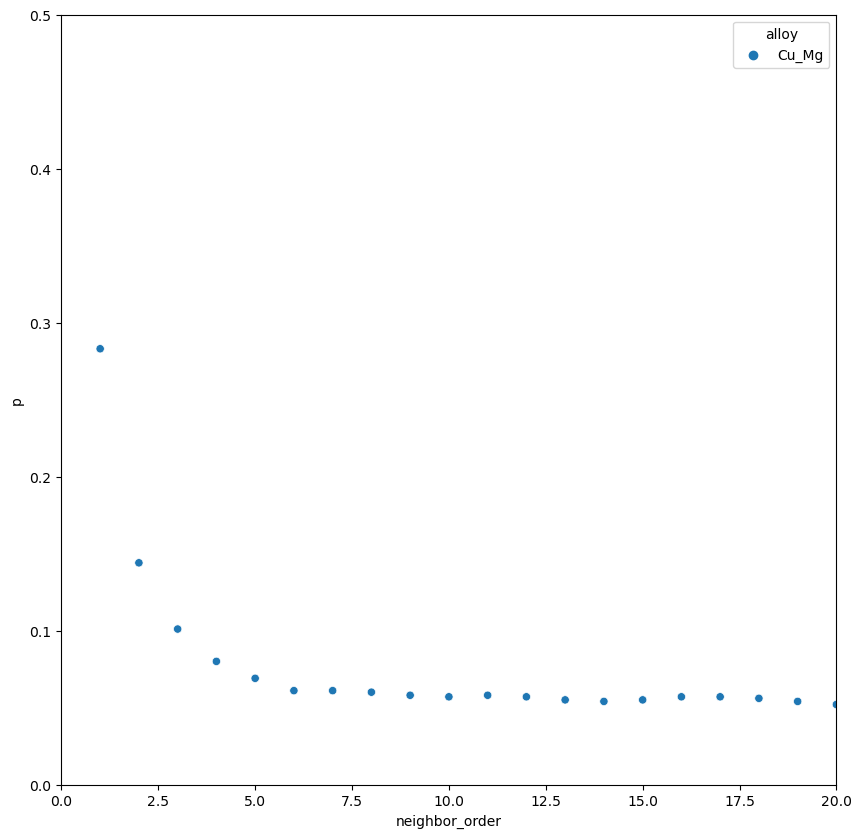

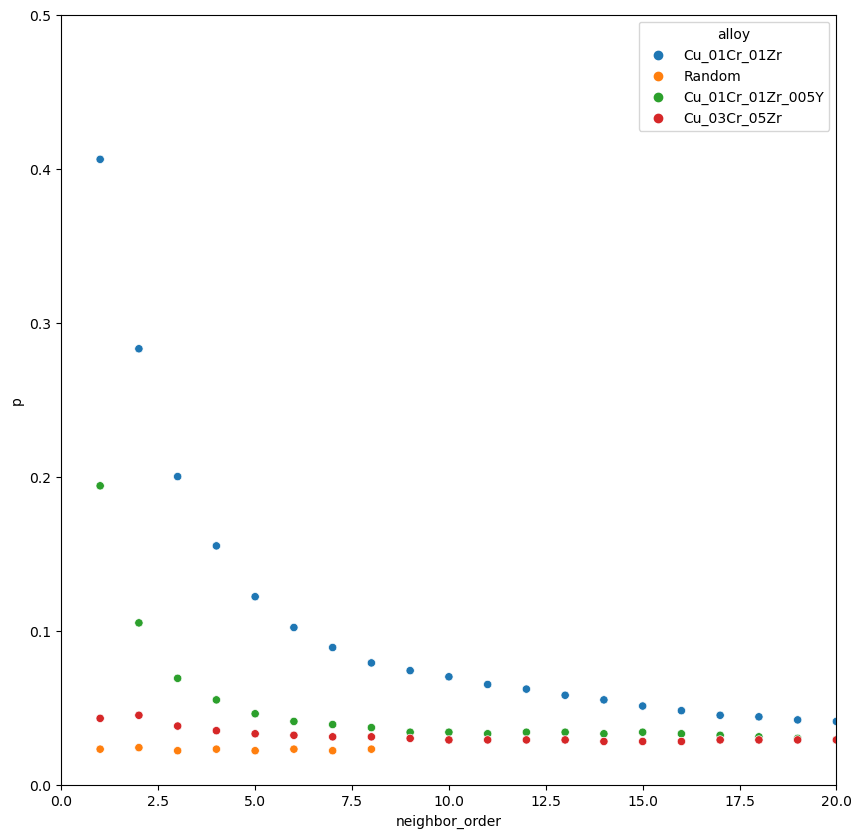

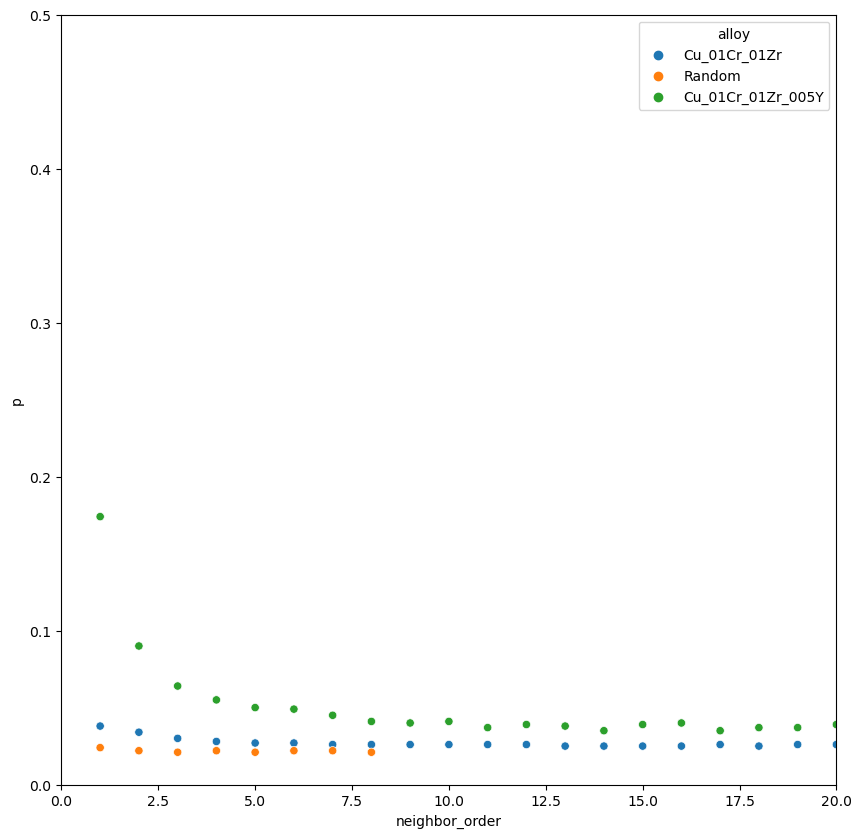

In [151]:
df = data_df

for i in [1, 2, 4, 8]:
    filt = (df['number_of_cells'] > 200)&(df['processing_stage'] == i)
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df[filt], x='neighbor_order', y='p', hue='alloy')
    plt.xlim([0, 20])
    plt.ylim([0, 0.5])
    plt.savefig(f'pictures2/PvsOrder{i}.png', dpi=300)

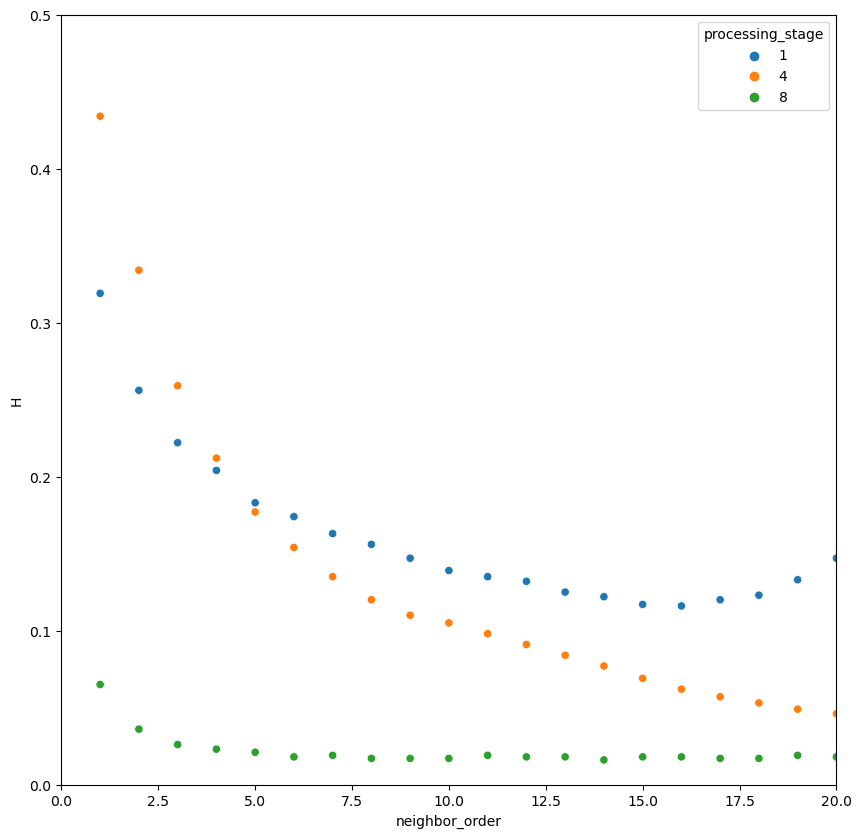

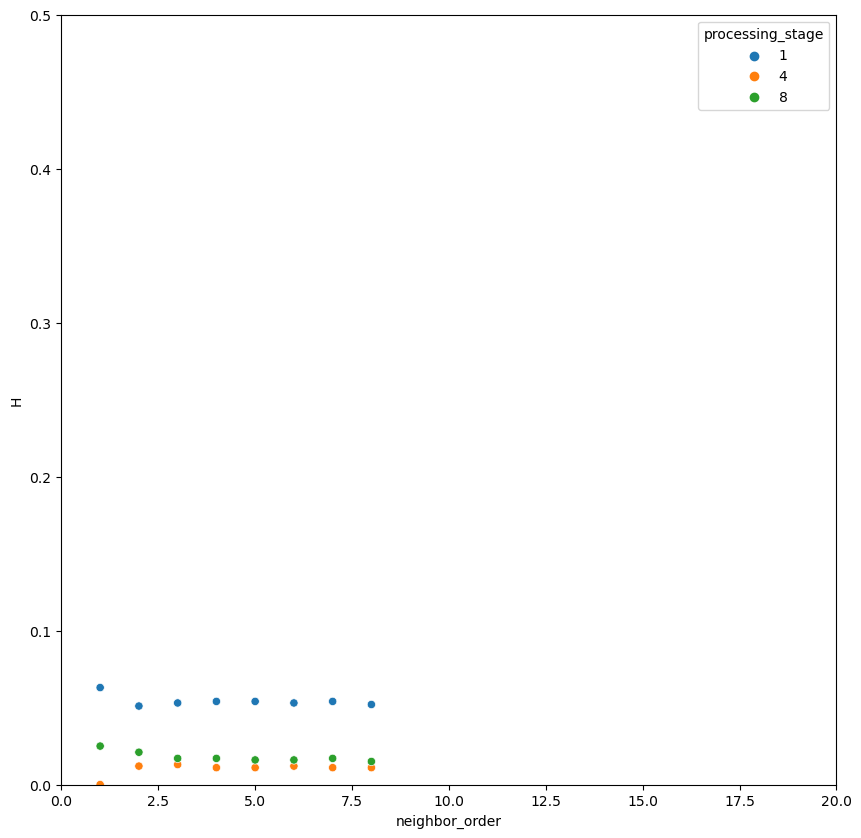

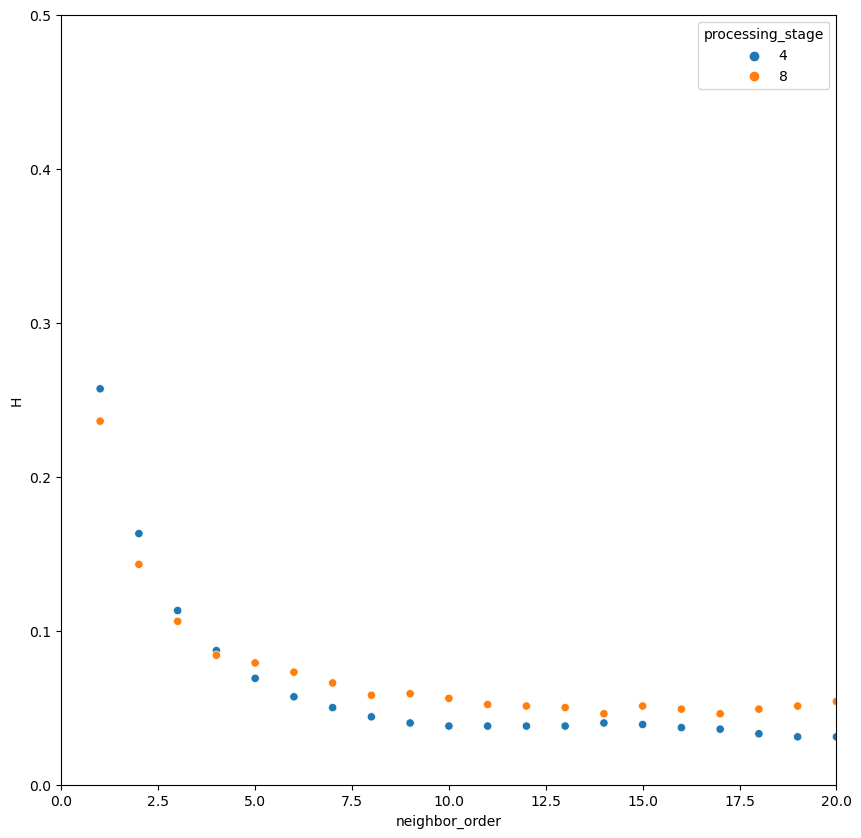

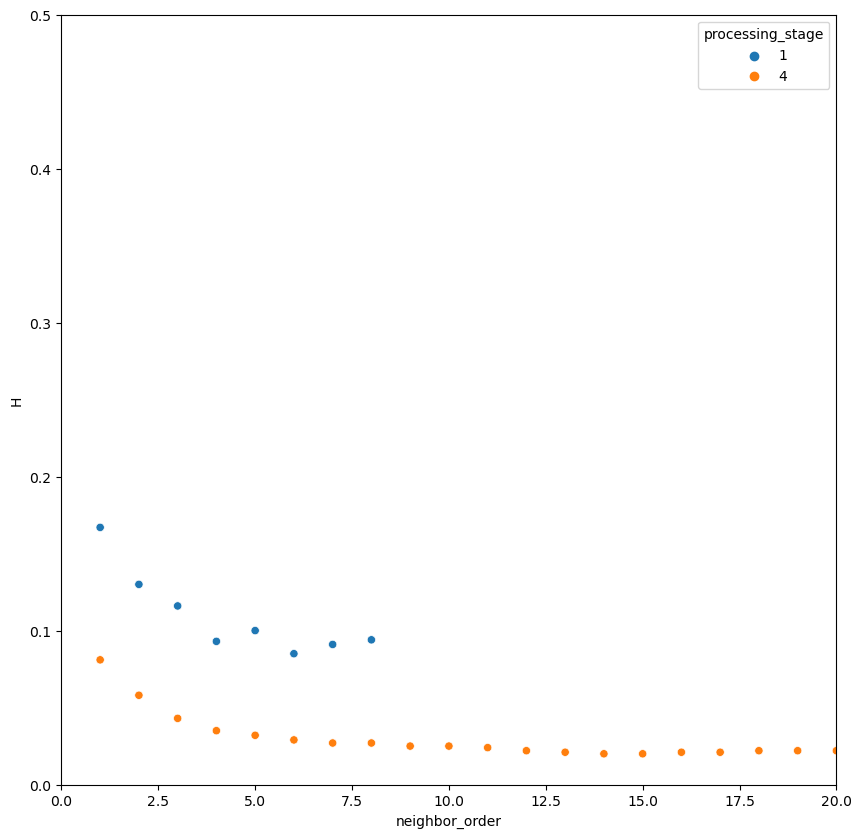

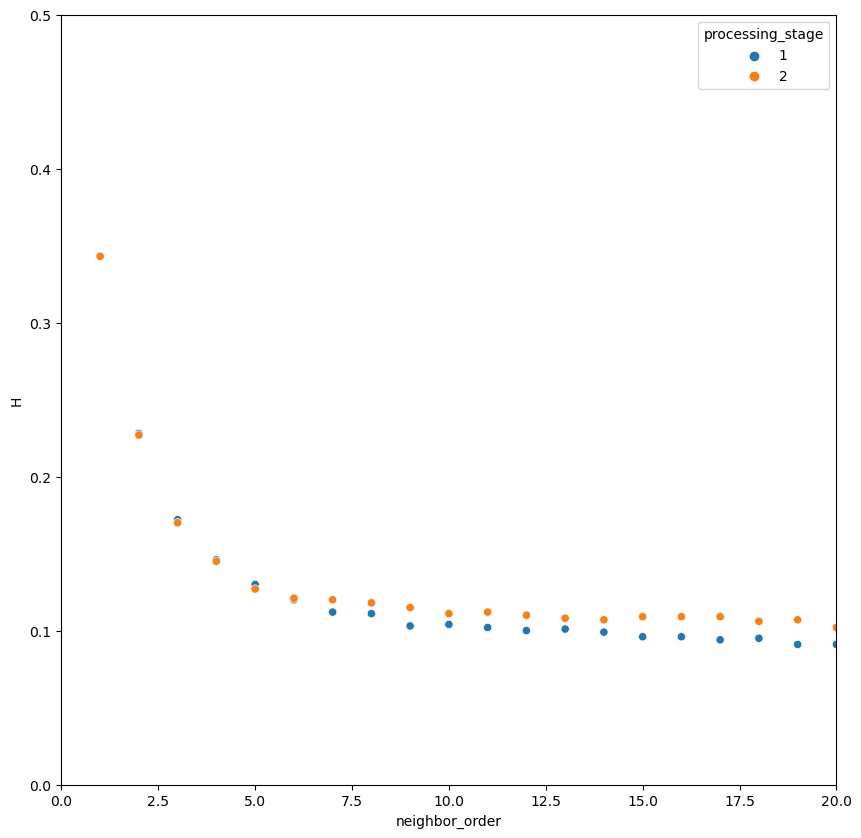

In [134]:
df = data_df

for alloy in df['alloy'].unique().tolist():
    filt = (df['number_of_cells'] > 200)&(df['alloy'] == alloy)
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df[filt], x='neighbor_order', y='H', hue='processing_stage', palette='tab10')
    plt.xlim([0, 20])
    plt.ylim([0, 0.5])
    plt.savefig(f'pictures2/HvsOrder-{alloy}.png', dpi=300)

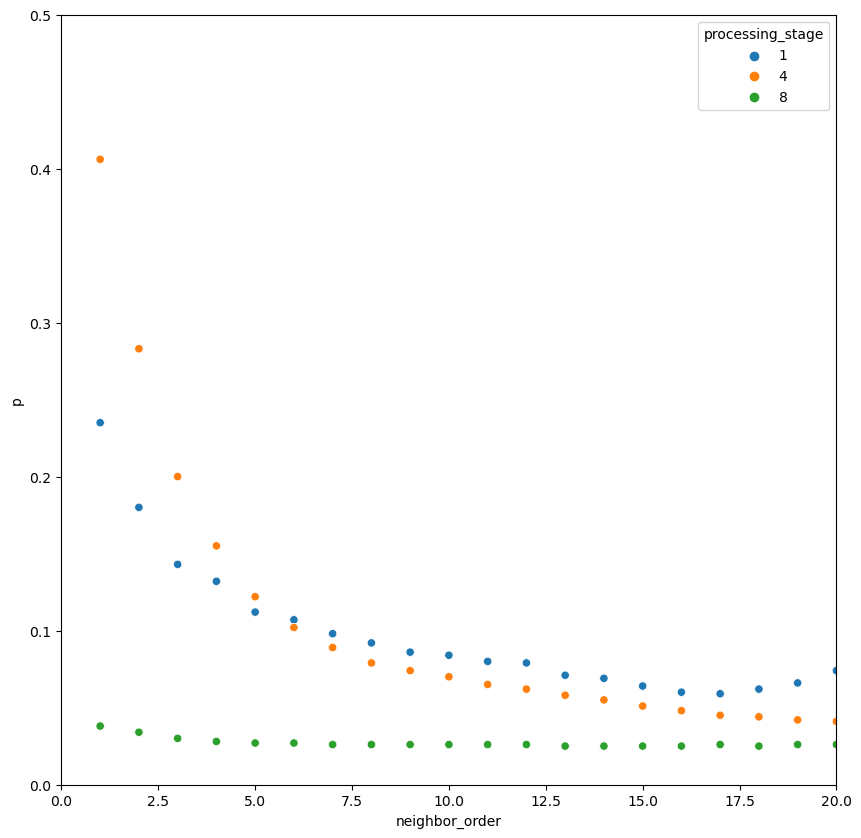

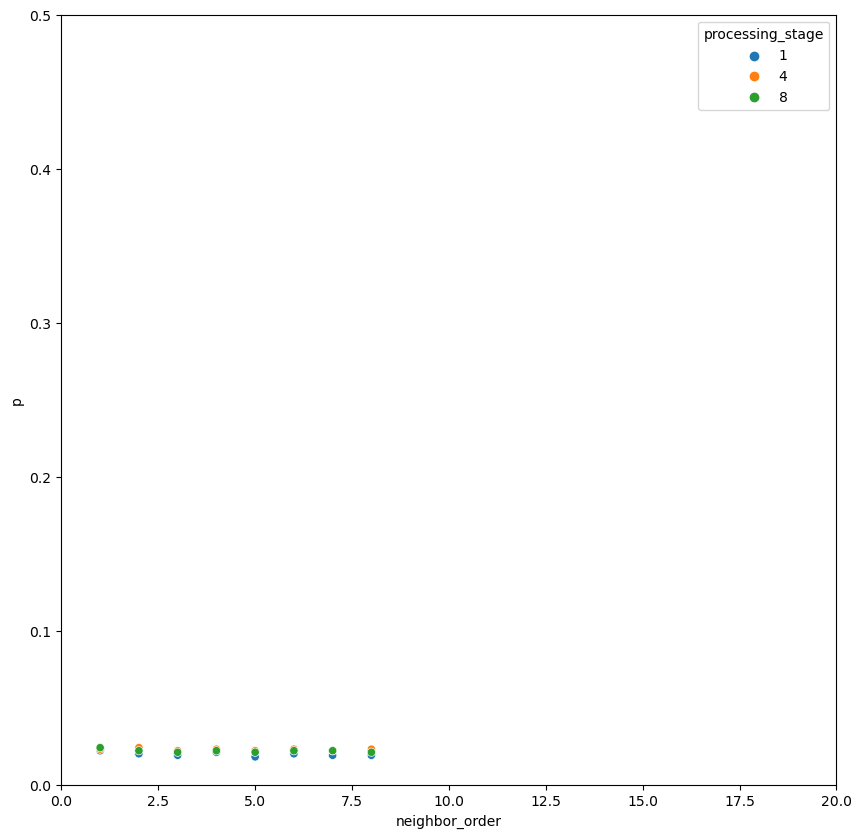

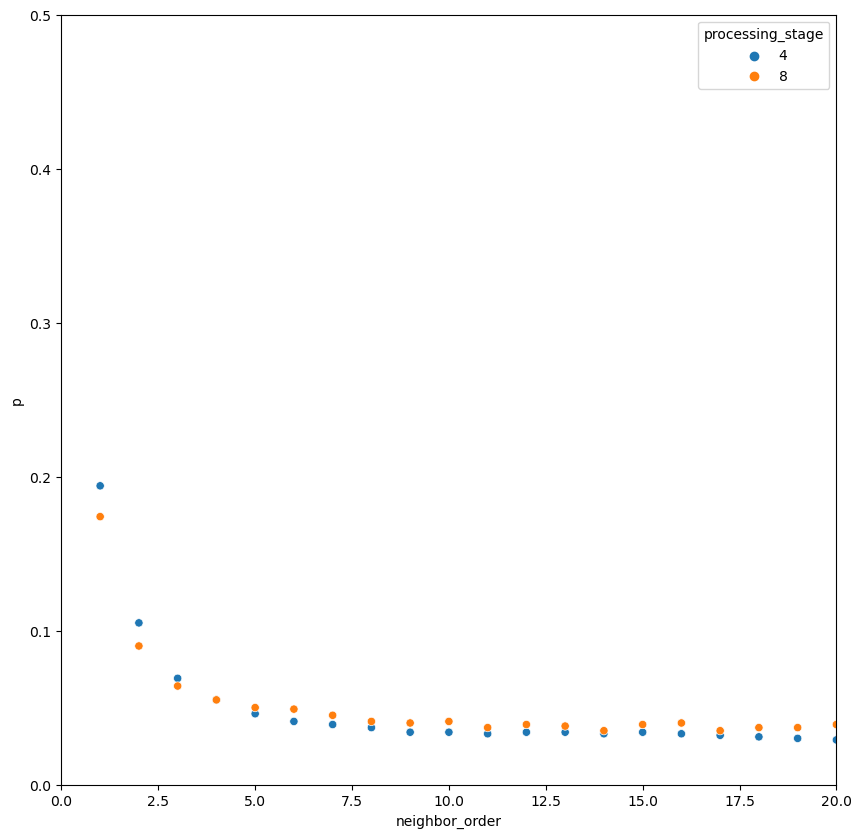

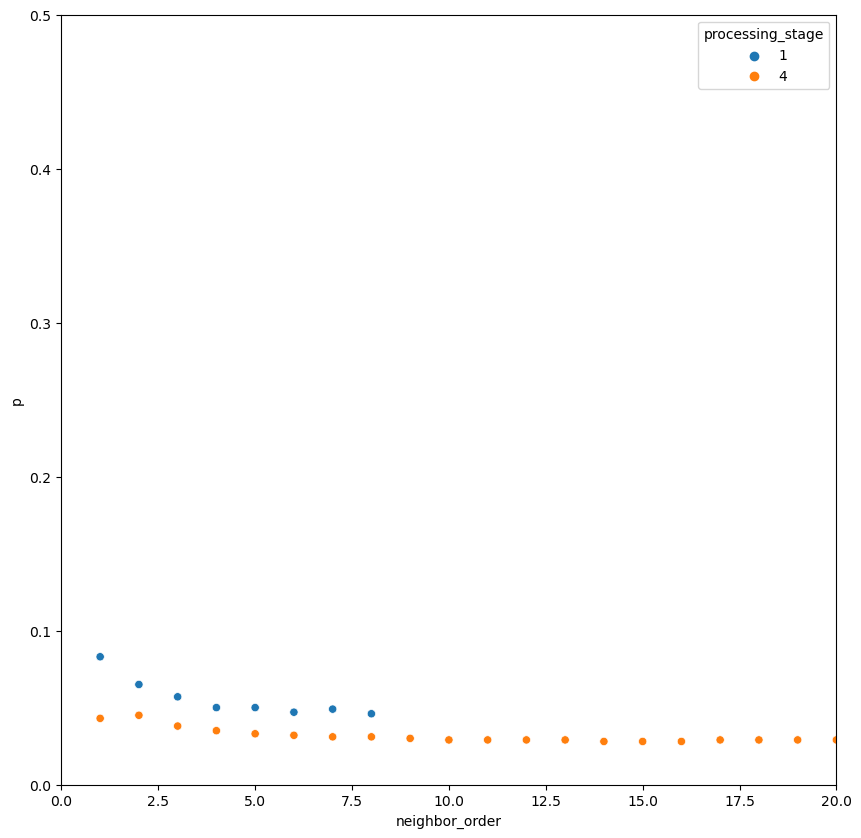

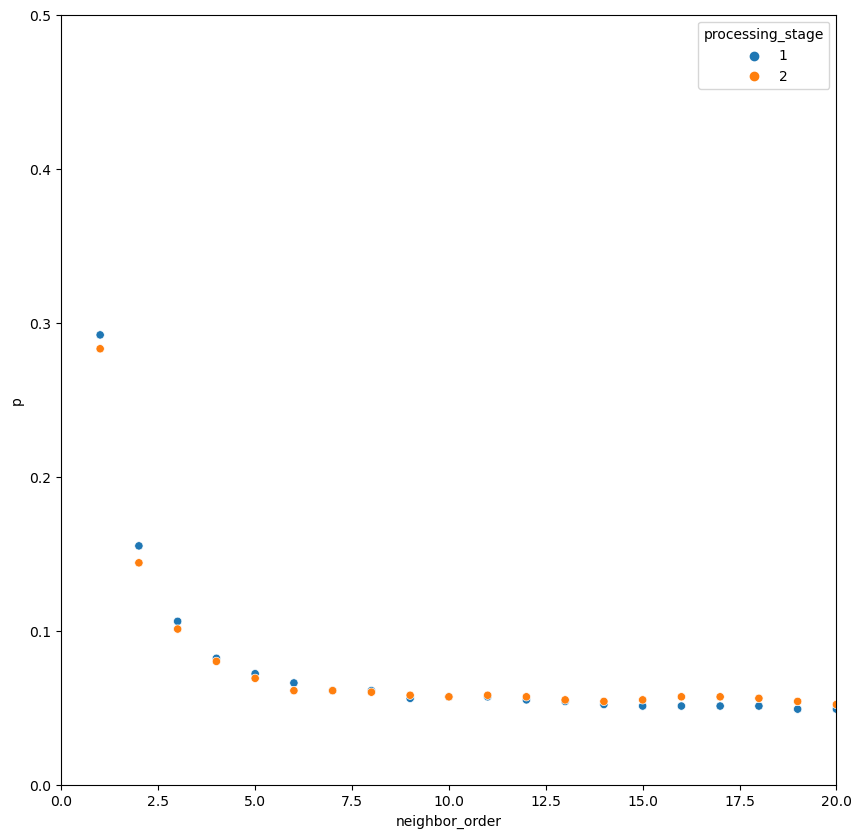

In [152]:
df = data_df

for alloy in df['alloy'].unique().tolist():
    filt = (df['number_of_cells'] > 200)&(df['alloy'] == alloy)
    plt.figure(figsize=(10, 10))
    sns.scatterplot(data=df[filt], x='neighbor_order', y='p', hue='processing_stage', palette='tab10')
    plt.xlim([0, 20])
    plt.ylim([0, 0.5])
    plt.savefig(f'pictures2/PvsOrder-{alloy}.png', dpi=300)

In [135]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [136]:
from scipy.optimize import curve_fit

In [137]:
xdata = np.arange(1,11)

In [138]:
xdata

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [143]:
ydata = df.loc[(df['alloy']=='Cu_01Cr_01Zr')&(df['processing_stage']==1), 'H'].tolist()[:10]

In [144]:
ydata

[0.319, 0.256, 0.222, 0.204, 0.183, 0.174, 0.163, 0.156, 0.147, 0.139]

In [149]:
ydata = df.loc[(df['alloy']=='Cu_01Cr_01Zr')&(df['processing_stage']==1), 'H'].tolist()[:10]
popt, pcov = curve_fit(func, xdata, ydata)

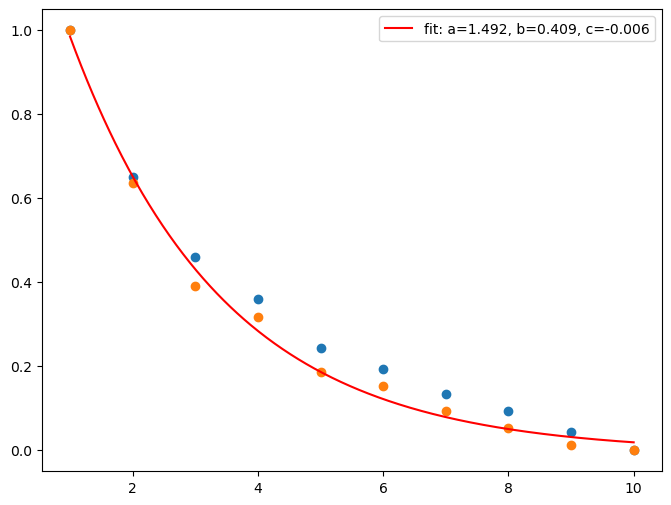

In [163]:
ydata = df.loc[(df['alloy']=='Cu_01Cr_01Zr')&(df['processing_stage']==1), 'H'].values[:10]
ydata = (ydata - np.min(ydata)) / (max(ydata) - min(ydata))
pdata = df.loc[(df['alloy']=='Cu_01Cr_01Zr')&(df['processing_stage']==1), 'p'].values[:10]
pdata = (pdata - np.min(pdata)) / (max(pdata) - min(pdata))
plt.scatter(xdata, ydata)
plt.scatter(xdata, pdata)

popt, pcov = curve_fit(func, xdata, pdata)
x = np.linspace(min(xdata), max(xdata), 500)
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

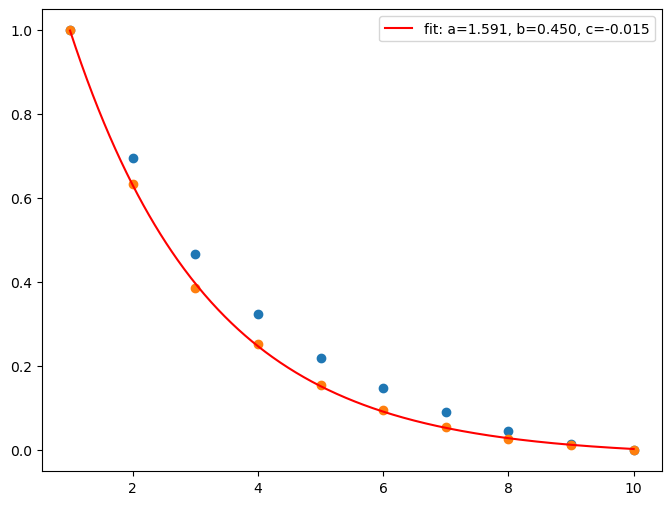

In [165]:
filt = (df['alloy']=='Cu_01Cr_01Zr')&(df['processing_stage']==4)

ydata = df.loc[filt, 'H'].values[:10]
ydata = (ydata - np.min(ydata)) / (max(ydata) - min(ydata))
pdata = df.loc[filt, 'p'].values[:10]
pdata = (pdata - np.min(pdata)) / (max(pdata) - min(pdata))
plt.scatter(xdata, ydata)
plt.scatter(xdata, pdata)

popt, pcov = curve_fit(func, xdata, pdata)
x = np.linspace(min(xdata), max(xdata), 500)
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

In [169]:
filt = (df['alloy']=='')&(df['processing_stage']==processing_stage)

In [171]:
np.any(filt)

False

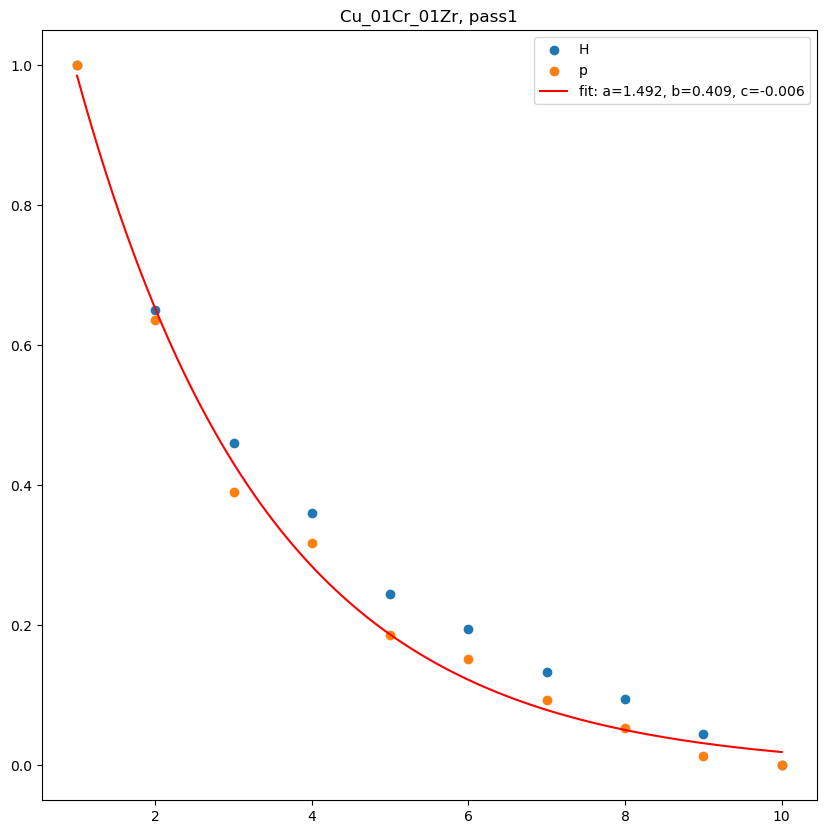

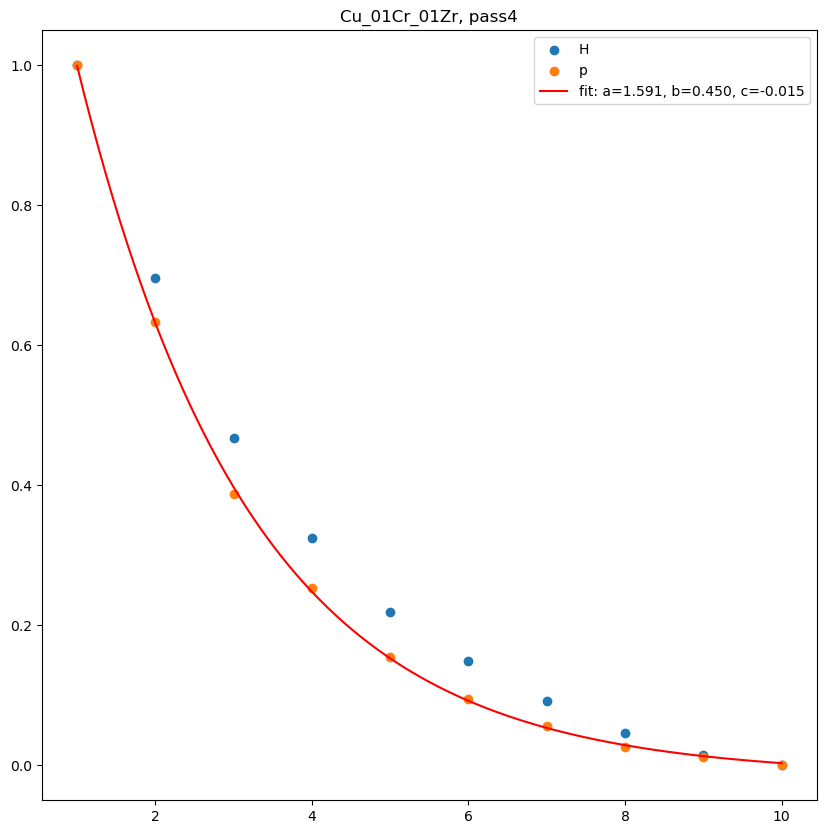

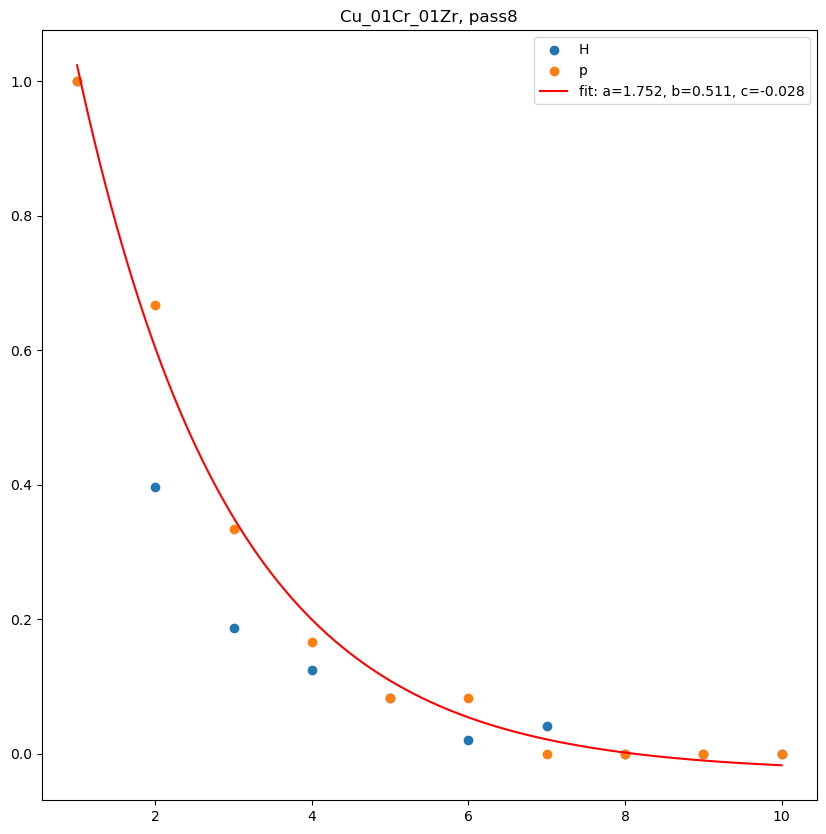

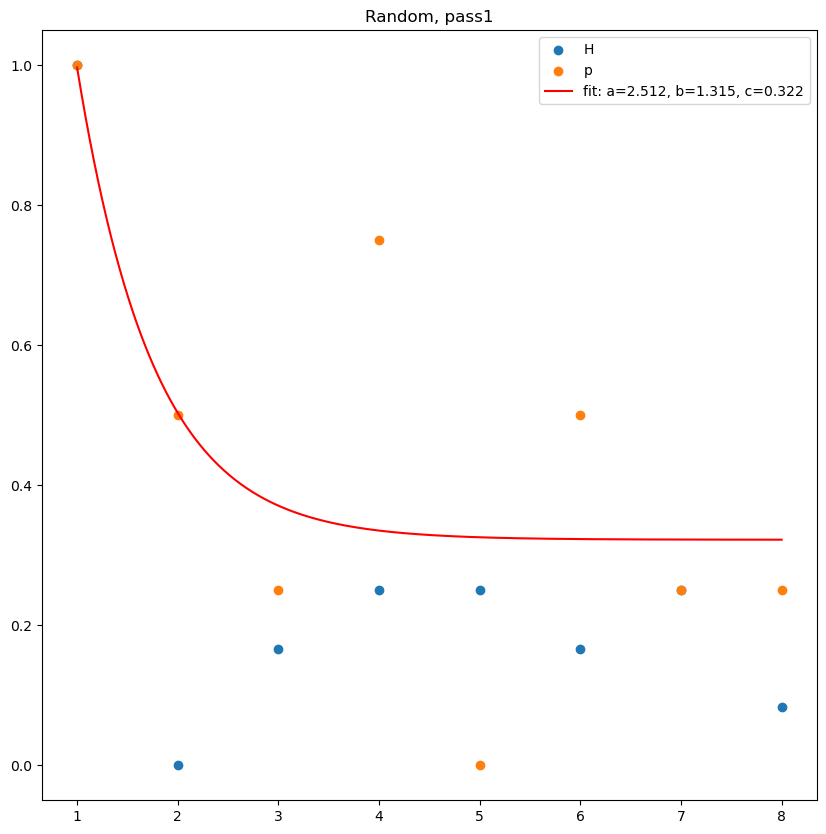

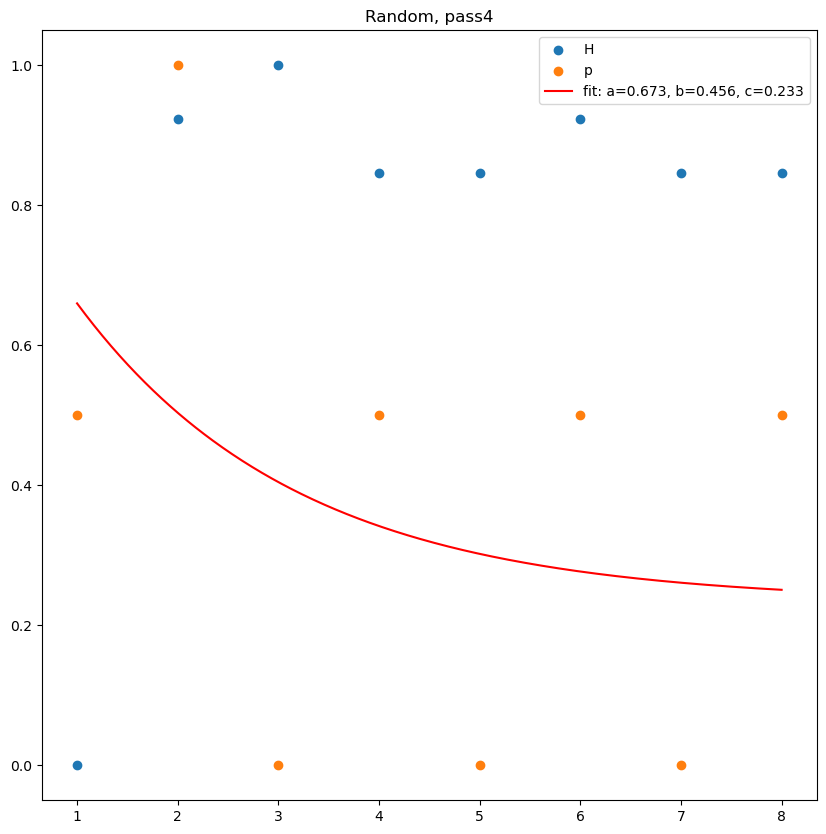

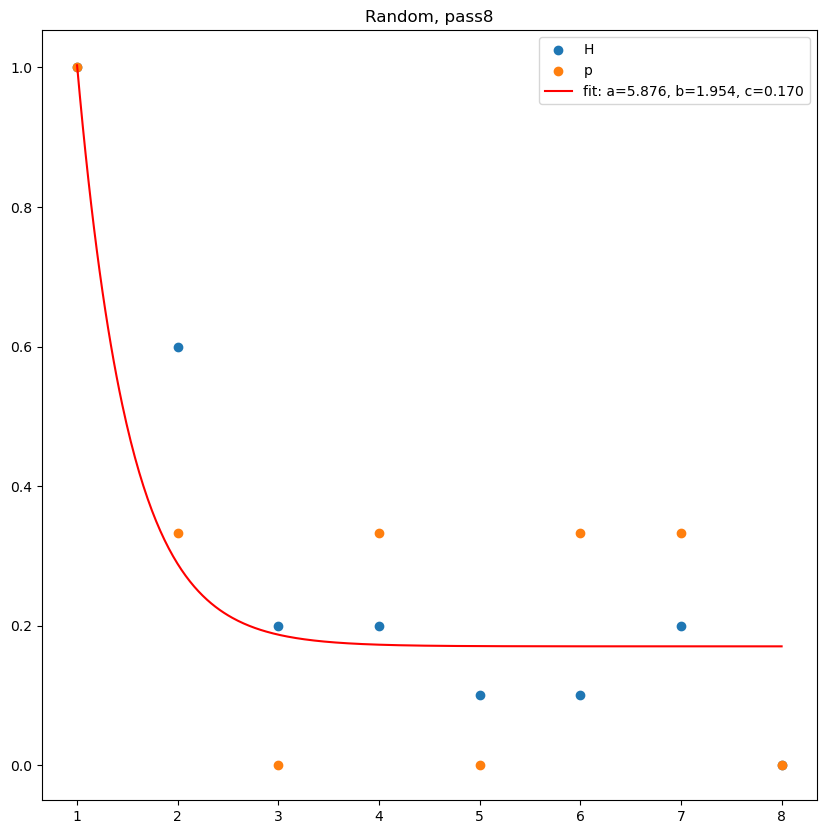

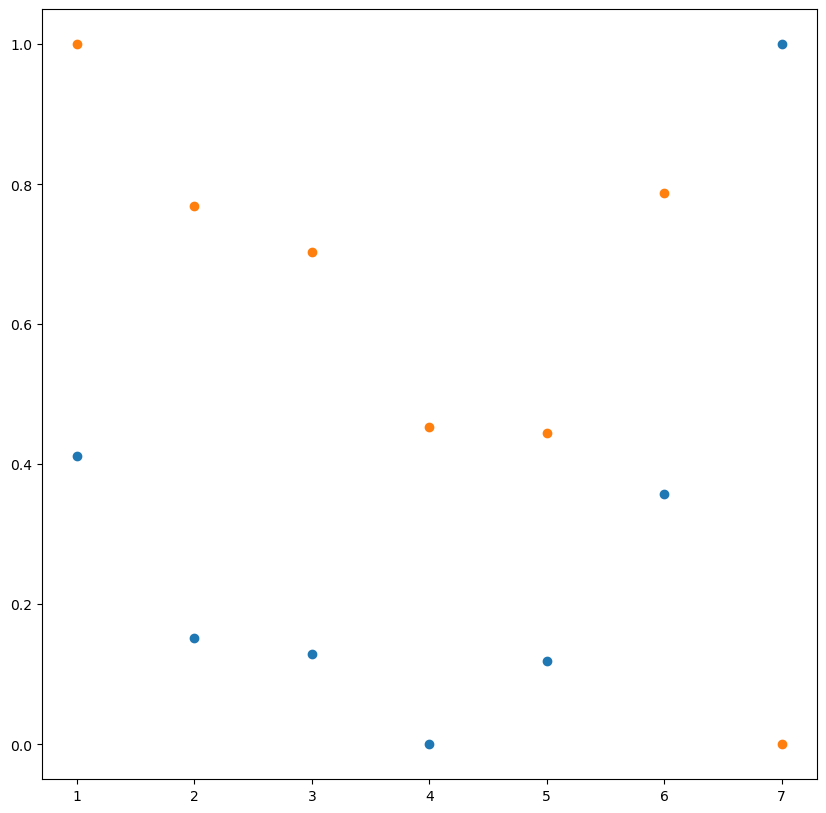

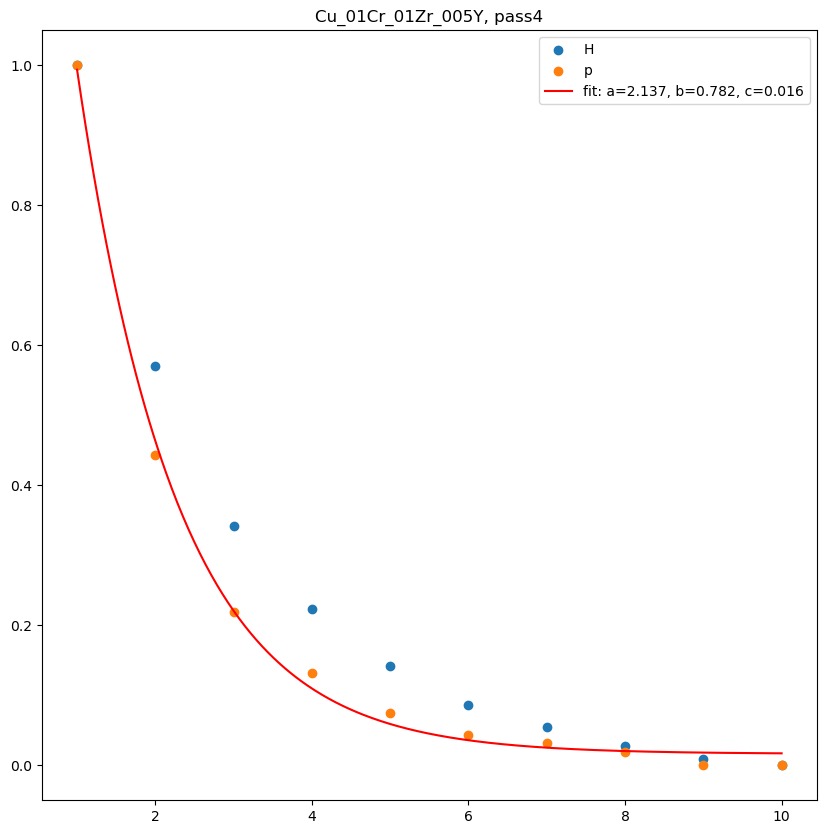

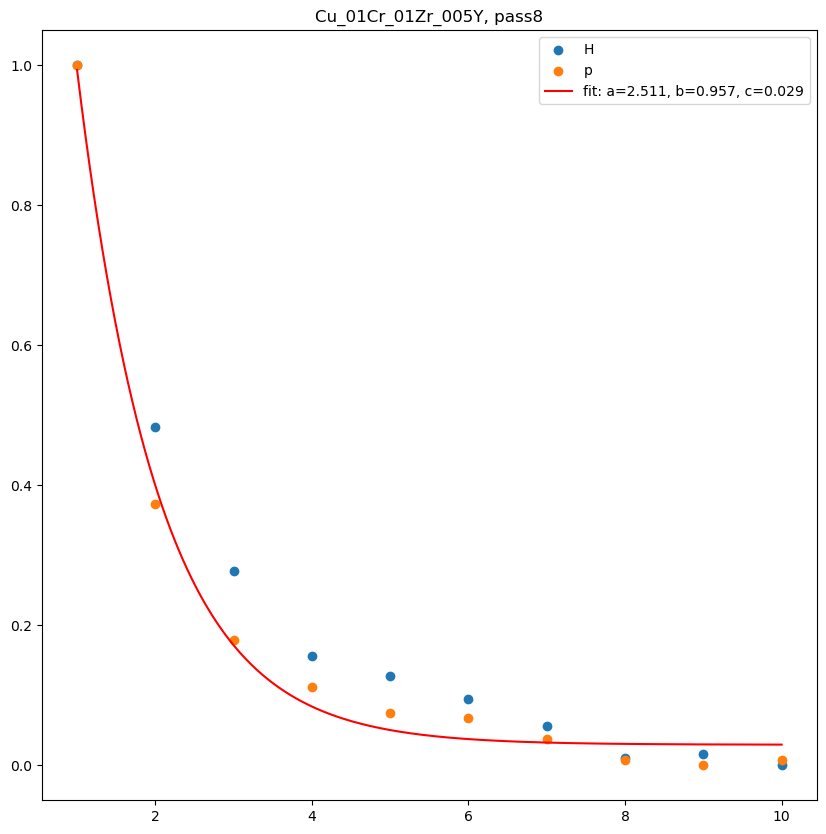

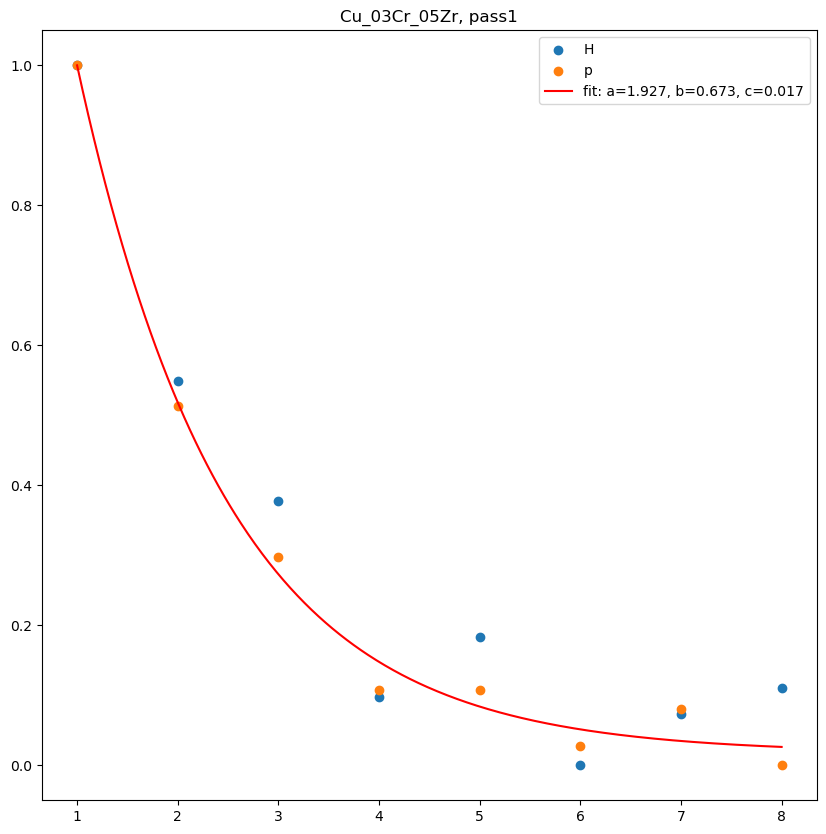

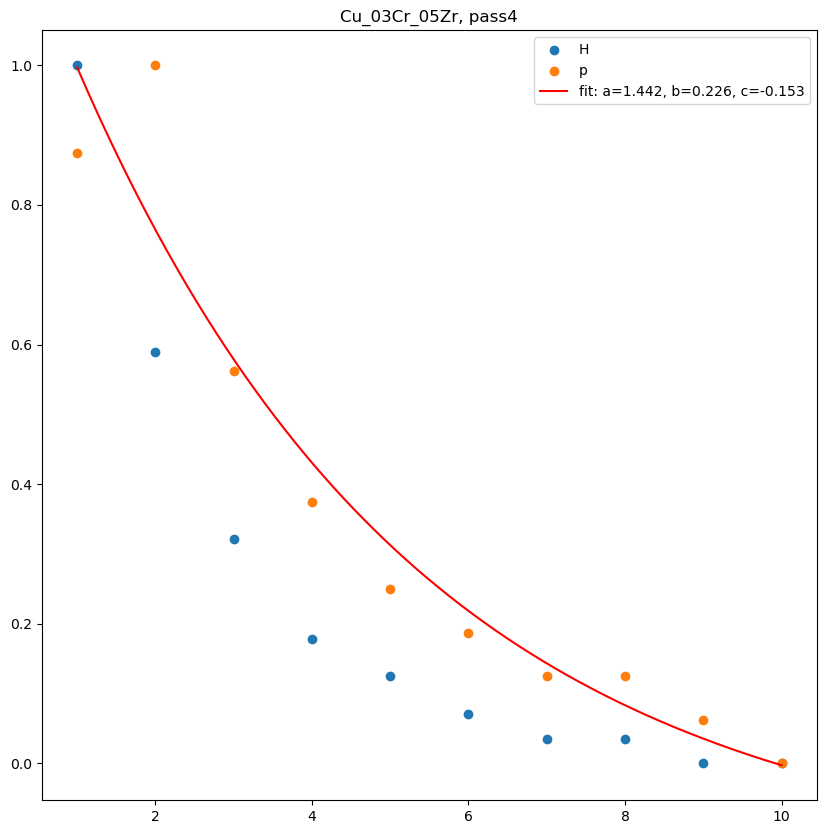

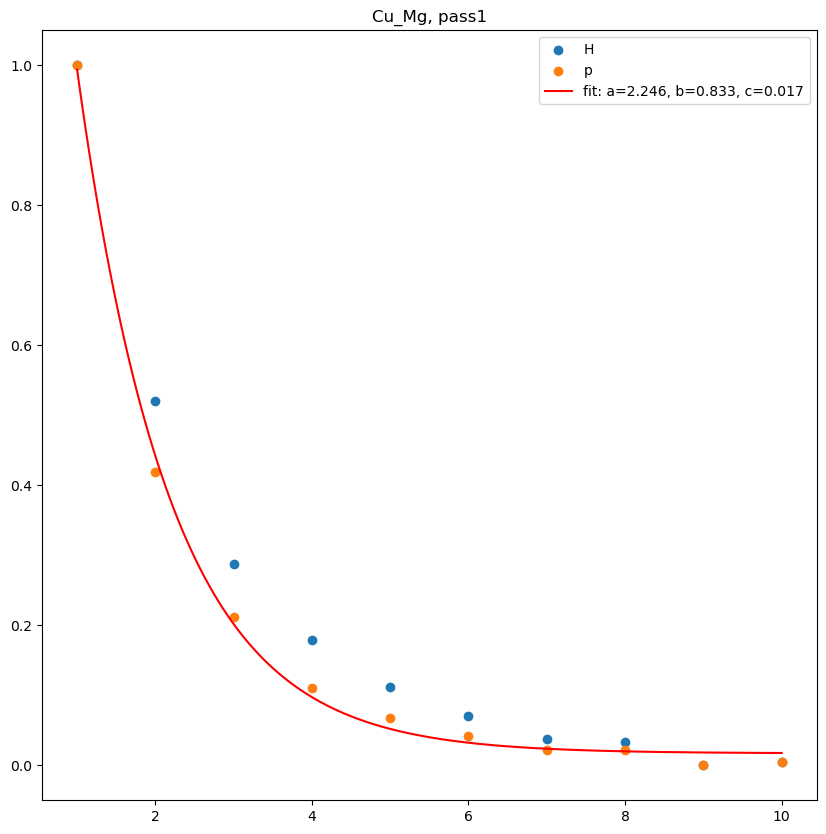

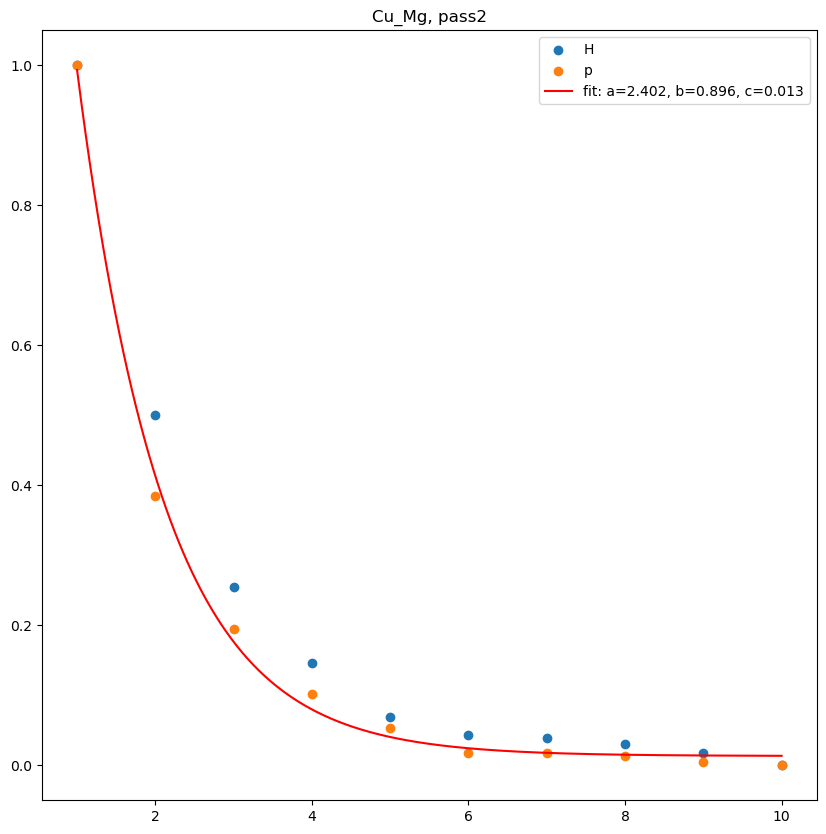

In [178]:
order = 10

for alloy in df['alloy'].unique().tolist():
    for processing_stage in [1, 2, 4, 8]:

        filt = (df['alloy']==alloy)&(df['processing_stage']==processing_stage)
        if np.any(filt):
            
            ydata = df.loc[filt, 'H'].values
            pdata = df.loc[filt, 'p'].values
            
            if len(ydata) < order:
                xdata = np.arange(1, len(ydata) + 1)
            else:
                xdata = np.arange(1, order + 1)
                ydata = ydata[:order]
                pdata = pdata[:order]
            
            ydata = (ydata - np.min(ydata)) / (max(ydata) - min(ydata))
            
            pdata = (pdata - np.min(pdata)) / (max(pdata) - min(pdata))
            
            plt.figure(figsize=(10, 10))
            plt.scatter(xdata, ydata, label='H')
            plt.scatter(xdata, pdata, label='p')

            try:
                popt, pcov = curve_fit(func, xdata, pdata)
                x = np.linspace(min(xdata), max(xdata), 500)
                plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
                plt.legend()
                plt.title(alloy + f', pass{processing_stage}')
                plt.savefig(f'pictures3/PHappr-{alloy}-pass{processing_stage}.png', dpi=300)
            except:
                continue

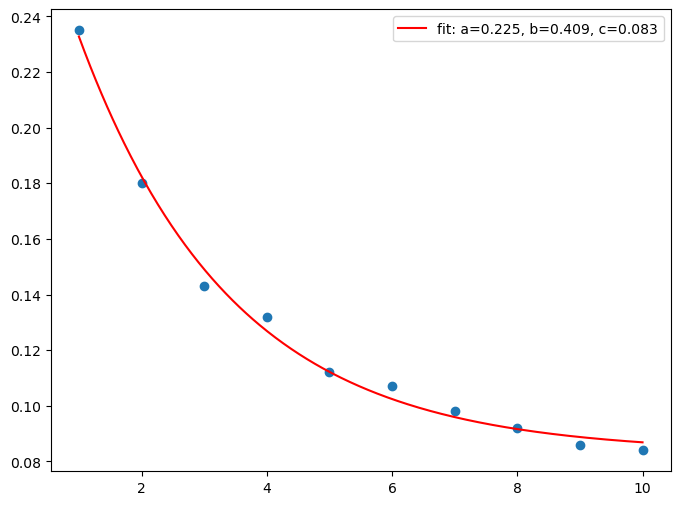

In [157]:
ydata = df.loc[(df['alloy']=='Cu_01Cr_01Zr')&(df['processing_stage']==1), 'p'].tolist()[:10]
popt, pcov = curve_fit(func, xdata, ydata)
plt.scatter(xdata, ydata)
x = np.linspace(min(xdata), max(xdata), 500)
plt.plot(x, func(x, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend()
plt.show()

<AxesSubplot:xlabel='p', ylabel='H'>

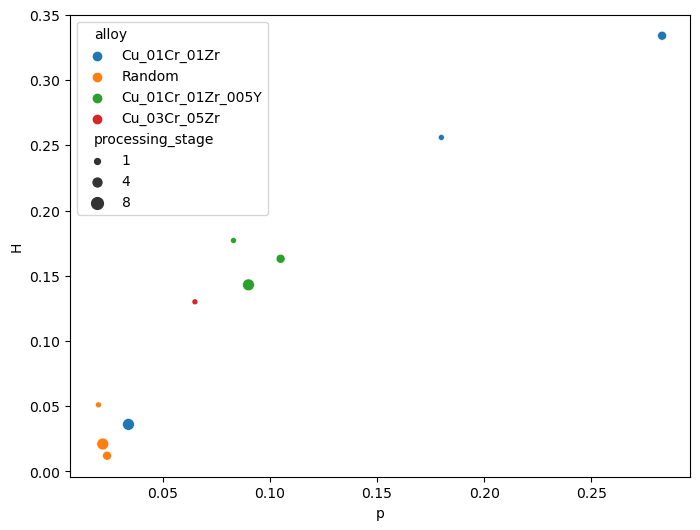

In [64]:
filt = (df['neighbor_order'] == 2) 
sns.scatterplot(data=df[filt], x='p', y='H', hue='alloy', size='processing_stage')

<AxesSubplot:xlabel='p', ylabel='H'>

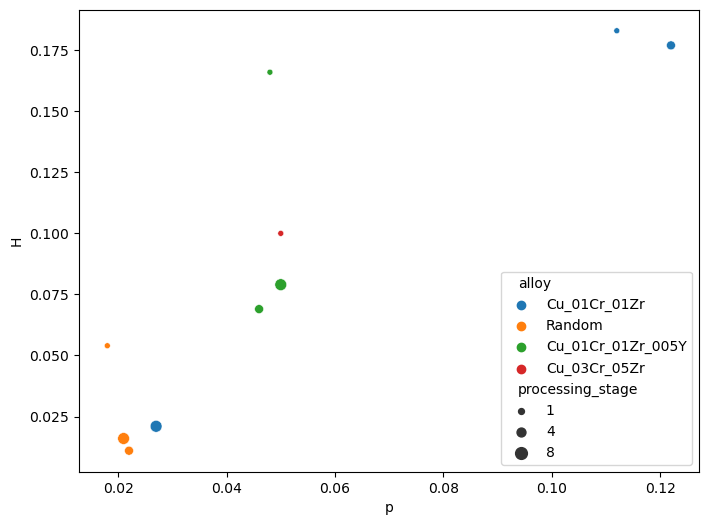

In [65]:
filt = (df['neighbor_order'] == 5) 
sns.scatterplot(data=df[filt], x='p', y='H', hue='alloy', size='processing_stage')

In [ ]:
filt = df['neighbor_order'] == 1
plt.plot(df.loc[filt, 'number_of_cells'], df.loc[filt, 'number_of_disangles'])
filt = df['neighbor_order'] == 5
plt.plot(df.loc[filt, 'number_of_cells'], df.loc[filt, 'number_of_disangles'])
filt = df['neighbor_order'] == 10
plt.plot(df.loc[filt, 'number_of_cells'], df.loc[filt, 'number_of_disangles'])

In [200]:
from math import sqrt, tan, sin, pi, acos, cos, radians

In [258]:
def cot(x):
    return 1 / tan(x)

In [257]:
def _Xfunc(x):
    return (sqrt(2) - 1) / sqrt(1 - (sqrt(2) - 1)**2 * cot(x / 2)**2)

In [256]:
def _Yfunc(x):
    
    return (sqrt(2) - 1)**2 / sqrt(3 - cot(x / 2)**2)

In [255]:
from math import degrees

In [294]:
class PhysicalUnitError(ValueError):
    pass


def mackenzie(angle, units='degrees', precision=5):
    """
    """
    if units == 'degrees':
        x = radians(angle)
    elif units == 'degrees':
        x = angles
        angle = degrees(angle)
    elif units != 'radians':
        raise PhysicalUnitError('Angle must be in radians or degrees')
    
    if angle < 0 or angle > 62.8:
        return 0.0
    elif angle <= 45:
        p_density = (2/15)*(1 - cos(x))    
    elif angle <= 60:
        p_density = (2/15)*(3*(sqrt(2) - 1)*sin(x) - 2*(1 - cos(x)))
        return round(p_density, precision)
    elif angle <= 60.72:
        p_density = (2/15)*((3*(sqrt(2) - 1) + 4/sqrt(3))*sin(x) - 6*(1 - cos(x)))
    elif angle <= 62.8:
        X = _Xfunc(x)
        Y = _Yfunc(x)
        p_density = (2 / 15) * (
            (3*(sqrt(2) - 1) + 4/sqrt(3))*sin(x) - 6*(1 - cos(x))
        ) - (8/5/pi)*(
            (2*(sqrt(2) - 1)*acos(X*cot(x/2))) + (1/sqrt(3))*acos(Y*cot(x/2))
        )*sin(x) + (8/5/pi)*(
            2*acos((sqrt(2) + 1)*X/sqrt(2)) + acos((sqrt(2) + 1)*Y/sqrt(2))
        )*(1 - cos(x))

                
    return round(p_density, precision)

In [295]:
for i in range(0, 60, 5):
    print(i, mackenzie(i))
print()
for i in np.arange(60, 60.72, 0.2):
    print(round(i,2), mackenzie(i))
print(60.72, mackenzie(60.72))
print()
for i in np.arange(61, 62.8, 0.4):
    print(round(i,2), mackenzie(i))
print(62.8, mackenzie(62.8))

0 0.0
5 0.00051
10 0.00203
15 0.00454
20 0.00804
25 0.01249
30 0.01786
35 0.02411
40 0.03119
45 0.03905
50 0.03167
55 0.02201

60.0 0.01015
60.2 0.00856
60.4 0.00695
60.6 0.00533
60.72 0.00436

61.0 0.00283
61.4 0.00151
61.8 0.0007
62.2 0.00024
62.6 2e-05
62.8 0.0


In [ ]:
uradians = np.vectorize(radians)

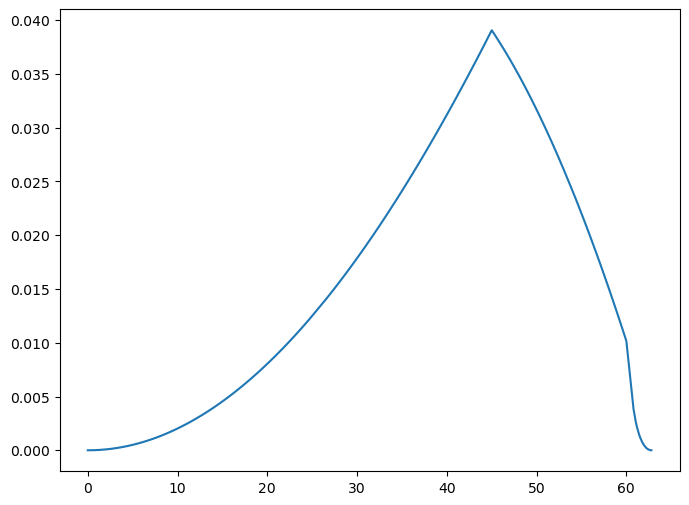

In [305]:
x = np.arange(0, 62.8, 0.01)
vm = np.vectorize(mackenzie) 
y = vm(x)
plt.plot(x, y)

In [ ]:
2/15 * (radians(45) - sin(radians(45)))

In [317]:
get_p(disangles[i])

(0.019, 0.981)

In [319]:
len(random_distr)

30537

In [318]:
get_p(random_distr)

(0.023, 0.977)

In [279]:
x = radians(60.7222222222222)
(2/15)*((3*(sqrt(2) - 1) + 4/sqrt(3))*sin(x) - 6*(1 - cos(x)))

0.004342071999008053

In [288]:
x = radians(61)

X = _Xfunc(x)
Y = _Yfunc(x)

(2 / 15)*((3*(sqrt(2) - 1) + 4/sqrt(3))*sin(x) - 6*(1 - cos(x))) -\
(8/5/pi)*(2*(sqrt(2) - 1)*acos(X*cot(x/2)) + (1/sqrt(3))*acos(Y*cot(x/2)))*sin(x) +\
(8/5/pi)*(2*acos((sqrt(2) + 1)*X/sqrt(2)) + acos((sqrt(2) + 1)*Y/sqrt(2)))*(1 - cos(x))

0.0028304335649601

In [243]:
mackenzie(15)

0.00454

In [209]:
X(radians(5))

ValueError: math domain error

In [211]:
tan(radians(5) / 2)

0.04366094290851206

In [217]:
sqrt(1 - (sqrt(2) - 1)**2 * cot(radians(60) / 2)**2)

0.6966213994980127

In [213]:
(sqrt(2) - 1)

0.41421356237309515

In [214]:
(sqrt(2) - 1)**2

0.17157287525381

In [215]:
cot(radians(5) / 2)**2

524.582476297504

In [216]:
(sqrt(2) - 1)**2 * cot(radians(5) / 2)**2

90.00412376612638

In [221]:
round(cot(radians(60) / 2)**2, 3)

3.0